# Topic project 4.1 Applying NLP for topic modelling in a real-life context

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
!pip install gensim pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import torch
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from nltk.corpus import stopwords
from hdbscan import HDBSCAN
from google.colab import files
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from bertopic import BERTopic
from transformers import pipeline
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

nltk.download('stopwords')
nltk.download('punkt')#for tokenisation
nltk.download('punkt_tab')#for tokenisation

/usr/local/lib/python3.11/dist-packages/hdbscan/plots.py:448: DeprecationWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.11/dist-packages/hdbscan/robust_single_linkage_.py:154: DeprecationWarning: invalid escape sequence '\{'
  """Perform robust single linkage clustering from a vector array
/usr/local/lib/python3.11/dist-packages/geopandas/_compat.py:7: DeprecationWarning: The 'shapely.geos' module is deprecated, and will be removed in a future version. All attributes of 'shapely.geos' are available directly from the top-level 'shapely' namespace (since shapely 2.0.0).
  import shapely.geos
/usr/local/lib/python3.11/dist-packages/spacy/cli/_util.py:23: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string
/usr/local/lib/python3.11/dist-packages/weasel/util/config.py:8: DeprecationWarning: Importing 'parser.split_arg

True

##Data Exploration and Cleaning

In [ ]:
#import data
df_google = pd.read_excel('Google_12_months.xlsx')
df_trustpilot = pd.read_excel('Trustpilot_12_months.xlsx')

In [ ]:
#view google data
df_google.head(2)

Customer Name SurveyID for external use (e.g. tech support)  \
0            **                      ekkt2vyxtkwrrrfyzc5hz6rk   
1            **                      e9b62vyxtkwrrrfyzc5hz6rk   

               Club's Name Social Media Source       Creation Date  \
0  Leeds City Centre North      Google Reviews 2024-05-09 23:49:18   
1   Cambridge Leisure Park      Google Reviews 2024-05-09 22:48:39   

                                             Comment  Overall Score  
0                                                NaN              4  
1  Too many students from two local colleges go h...              1

In [ ]:
#view trustpilot
df_trustpilot.head(2)

Review ID Review Created (UTC)   Review Consumer User ID  \
0  663d40378de0a14c26c2f63c  2024-05-09 23:29:00  663d4036d5fa24c223106005   
1  663d3c101ccfcc36fb28eb8c  2024-05-09 23:11:00  5f5e3434d53200fa6ac57238   

                    Review Title  \
0        A very good environment   
1  I love to be part of this gym   

                                      Review Content  Review Stars  \
0                            A very good environment             5   
1  I love to be part of this gym. Superb value fo...             5   

  Source Of Review Review Language              Domain URL Webshop Name  \
0            AFSv2              en  http://www.puregym.com   PureGym UK   
1            AFSv2              en  http://www.puregym.com   PureGym UK   

           Business Unit ID  Tags Company Reply Date (UTC)  \
0  508df4ea00006400051dd7b1   NaN      2024-05-10 08:12:00   
1  508df4ea00006400051dd7b1   NaN      2024-05-10 08:13:00   

                Location Name                           Location ID  
0  Solihull Sears Retail Park  7b03ccad-4a9d-4a33-9377-ea5bba442dfc  
1                   Aylesbury  612d3f7e-18f9-492b-a36f-4a7b86fa5647

In [ ]:
#remove unecessary columns from trustpilot reviews
df_trustpilot.drop(columns=['Review ID','Review Consumer User ID','Source Of Review','Domain URL','Webshop Name','Business Unit ID','Tags','Location ID'],inplace=True)
df_trustpilot.sample(2)

Review Created (UTC)                        Review Title  \
15419  2023-06-09 09:40:00  A basic, no frills added gym group   
8331   2023-12-28 10:15:00                          Great Gym.   

                                          Review Content  Review Stars  \
15419  A basic, no frills gym, as reflected in the mo...             3   
8331   Clean, well resourced and easy to use. Great s...             5   

      Review Language Company Reply Date (UTC) Location Name  
15419              en      2023-06-14 08:31:00           NaN  
8331               en      2024-01-15 14:26:00           NaN

In [ ]:
#check data types and nulls
df_trustpilot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16673 entries, 0 to 16672
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Review Created (UTC)      16673 non-null  datetime64[ns]
 1   Review Title              16673 non-null  object        
 2   Review Content            16673 non-null  object        
 3   Review Stars              16673 non-null  int64         
 4   Review Language           16673 non-null  object        
 5   Company Reply Date (UTC)  16164 non-null  datetime64[ns]
 6   Location Name             11323 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 911.9+ KB


In [ ]:
#remove unecessary google data columns
df_google.drop(columns=['Customer Name','SurveyID for external use (e.g. tech support)','Social Media Source'],axis=1,inplace=True)
df_google.head(2)

Club's Name       Creation Date  \
0  Leeds City Centre North 2024-05-09 23:49:18   
1   Cambridge Leisure Park 2024-05-09 22:48:39   

                                             Comment  Overall Score  
0                                                NaN              4  
1  Too many students from two local colleges go h...              1

In [ ]:
#check data types and nulls
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23250 entries, 0 to 23249
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Club's Name    23250 non-null  object        
 1   Creation Date  23250 non-null  datetime64[ns]
 2   Comment        13898 non-null  object        
 3   Overall Score  23250 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 726.7+ KB


In [ ]:
#drop rows with null data
df_google.dropna(subset=['Comment'],inplace=True)
df_trustpilot.dropna(subset=['Review Content'],inplace=True)

In [ ]:
#drop non english reviews in trustpilot
df_trustpilot = df_trustpilot[df_trustpilot['Review Language']=='en'].drop(columns=['Review Language'],axis=1)

In [ ]:
#rename columns for easier use
df_google=df_google.rename(columns={"Club's Name":'location',
                          "Creation Date":'review_date',
                          "Comment":'review',
                          "Overall Score":'score'
                          })
df_trustpilot=df_trustpilot.rename(columns={"Review Created (UTC)":'review_date',
                          "Review Title":'title',
                          "Review Content":'review',
                          "Review Stars":'score',
                          "Company Reply Date (UTC)":'reply_date',
                          "Location Name":'location'
                          })

In [ ]:
print('Google Locations:' ,df_google['location'].nunique())
print('Trustpilot Locations:',df_trustpilot['location'].nunique())
common_locations = set(df_google['location']).intersection(set(df_trustpilot['location']))
print('Common locations:',len(common_locations))

Google Locations: 512
Trustpilot Locations: 376
Common locations: 310


In [ ]:
#extract negative reviews only
neg_google_reviews = df_google[df_google["score"] < 3].copy()
neg_trustpilot_reviews = df_trustpilot[df_trustpilot["score"] < 3].copy()

##Data Preprocessing

In [ ]:
def preprocess_text(df,col):
    #remove html tags
    df[col] = df[col].apply(lambda x: re.sub(r'<.*?>', '', x))
    #convert to lower case and remove numbers
    reviews = df[col].str.lower().str.replace(r'\d+','',regex=True).str.cat(sep=' ')
    #remove punctuation.
    reviews = reviews.translate(str.maketrans('', '', string.punctuation))
    #tokenise the words
    word_tokens = word_tokenize(reviews)
    #set and remove stop words
    stop_words = set(stopwords.words('english'))
    #add gym to stop words as add no value
    custom_stop_words = stop_words.union({'gym'})
    filtered_tokens = [w for w in word_tokens if not w.lower() in custom_stop_words]
    #remove short words
    filtered_tokens = [w for w in filtered_tokens if len(w) > 2]

    return filtered_tokens

In [ ]:
google_tokens = preprocess_text(df_google,'review')
trustpilot_tokens = preprocess_text(df_trustpilot,'review')

##Initial Data Investigation

In [ ]:
def freq_dist(tokens):
    dist = nltk.FreqDist(tokens)
    freq_df = pd.DataFrame(dist.most_common(10),
                    columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Word", y="Frequency", data=freq_df)
    plt.tight_layout()


def wordcloud(tokens):
    wc = WordCloud(
        background_color='black',
        max_words=1000,
        max_font_size=50,
        width=800,
        height=400,
        random_state=42
    ).generate(' '.join(tokens))
    plt.figure(figsize=(10, 10), dpi=150)  # smaller size, higher dpi
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')

Text(0.5, 1.0, 'Fig 1B - Top 10 Words in Trustpilot Reviews')

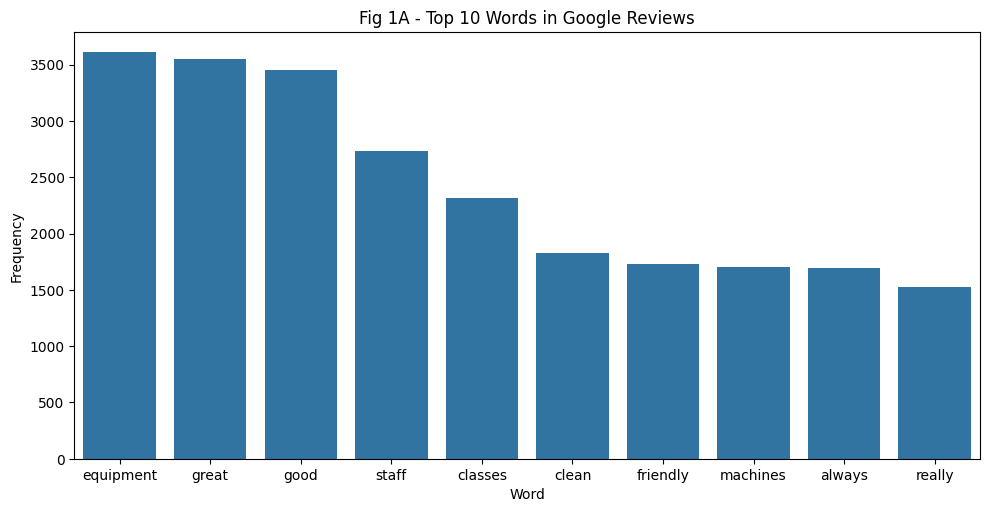

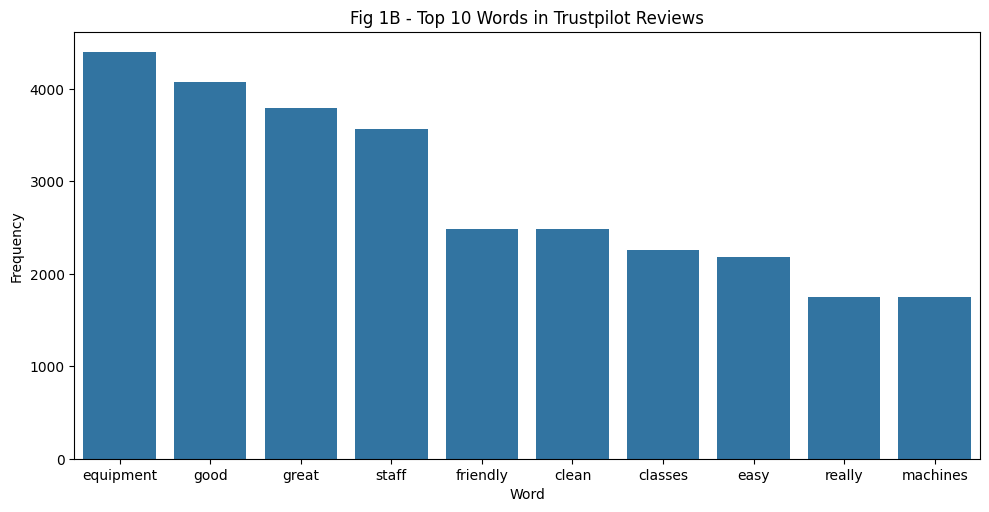

In [ ]:
#plot top 10 words in google reviews
freq_dist(google_tokens)
plt.title('Fig 1A - Top 10 Words in Google Reviews')
#plot top 10 words in trustpilot reviews
freq_dist(trustpilot_tokens)
plt.title('Fig 1B - Top 10 Words in Trustpilot Reviews')

Text(0.5, 1.0, 'Fig 1D - Trustpilot Reviews - Word Cloud')

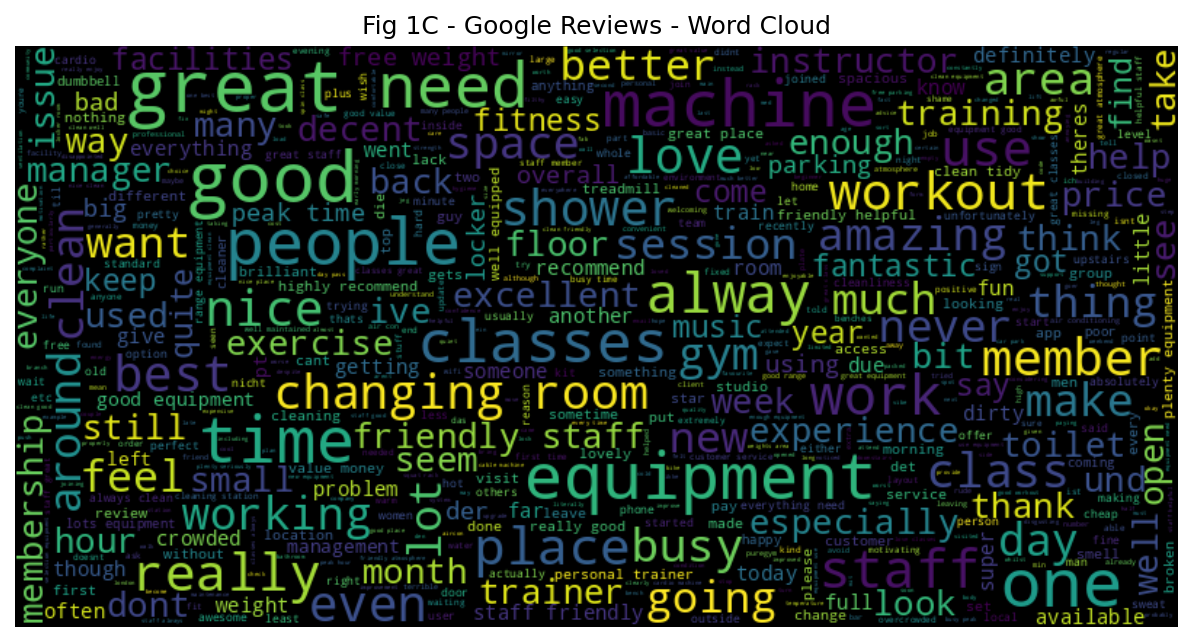

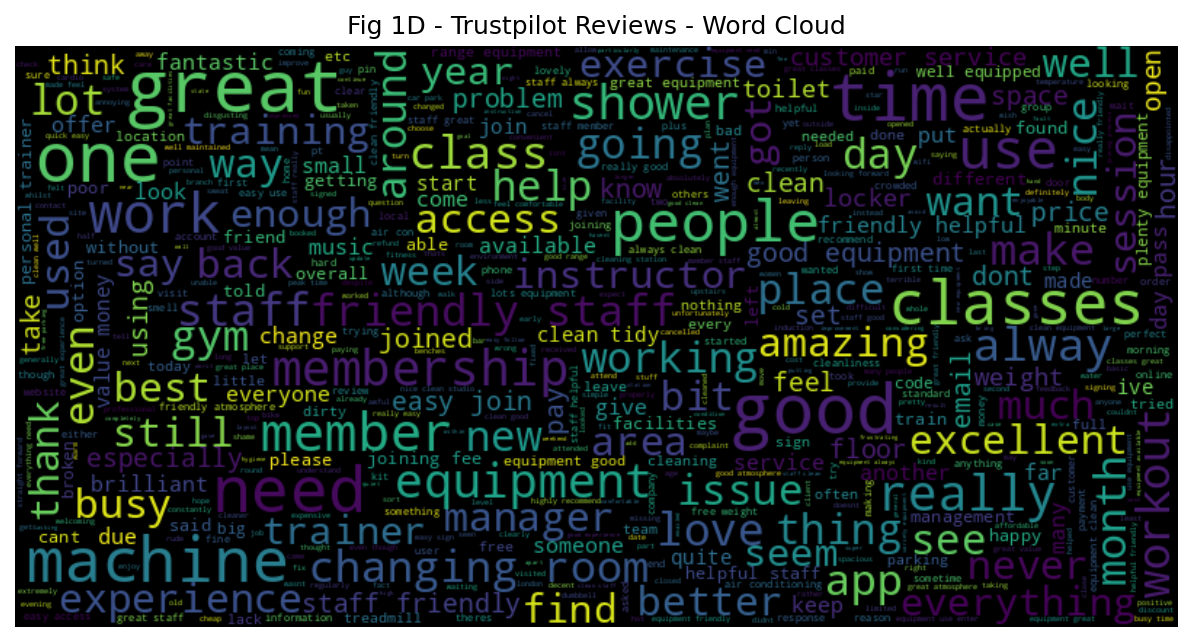

In [ ]:
#wordcloud for google reviews
wordcloud(google_tokens)
plt.title('Fig 1C - Google Reviews - Word Cloud')
#wordcloud for trustpilot reviews
wordcloud(trustpilot_tokens)
plt.title('Fig 1D - Trustpilot Reviews - Word Cloud')

In [ ]:
#repeat process above on the negative reviews only
neg_google_tokens = preprocess_text(neg_google_reviews,'review')
neg_trustpilot_tokens = preprocess_text(neg_trustpilot_reviews,'review')

Text(0.5, 1.0, 'Fig 2B - Negative Trustpilot Reviews - Top 10 Words')

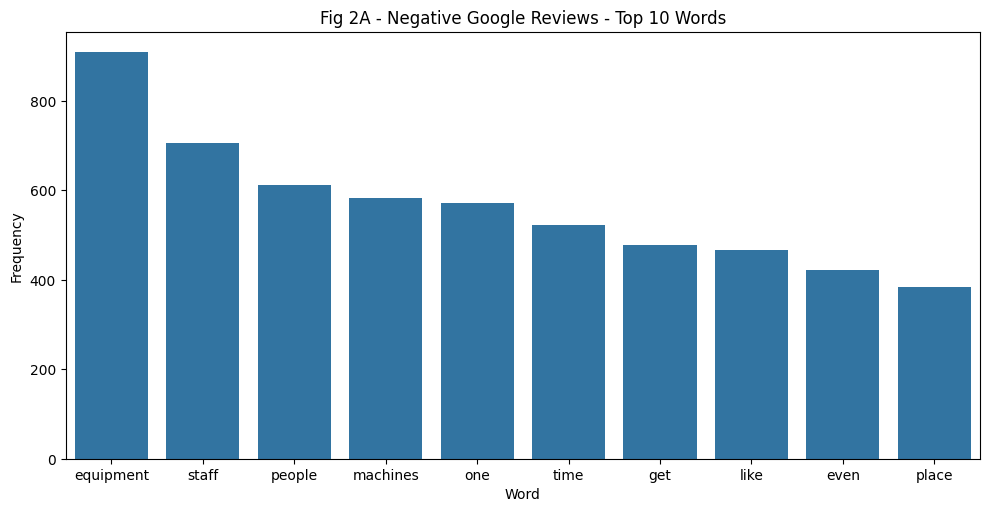

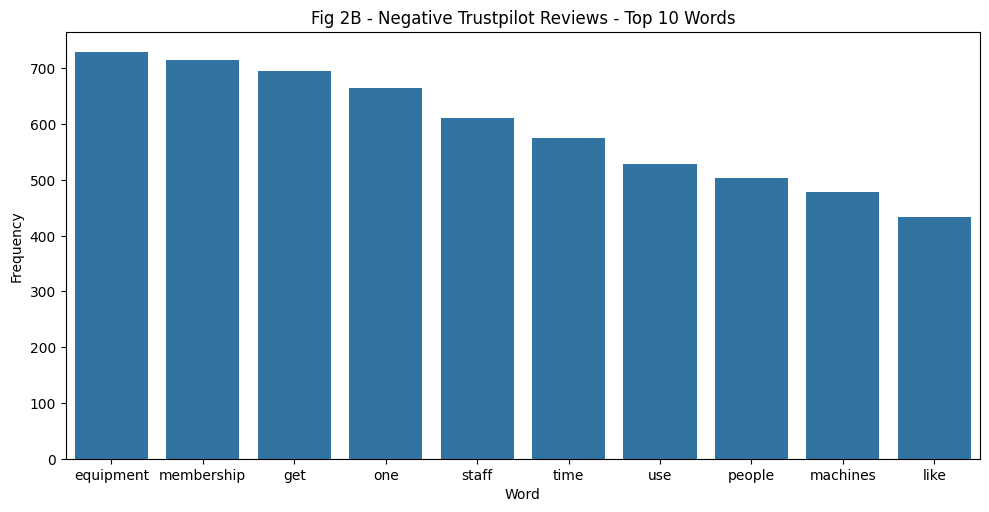

In [ ]:
freq_dist(neg_google_tokens)
plt.title('Fig 2A - Negative Google Reviews - Top 10 Words')
freq_dist(neg_trustpilot_tokens)
plt.title('Fig 2B - Negative Trustpilot Reviews - Top 10 Words')

Text(0.5, 1.0, 'Fig 2D - Negative Trustpilot Reviews - Word Cloud')

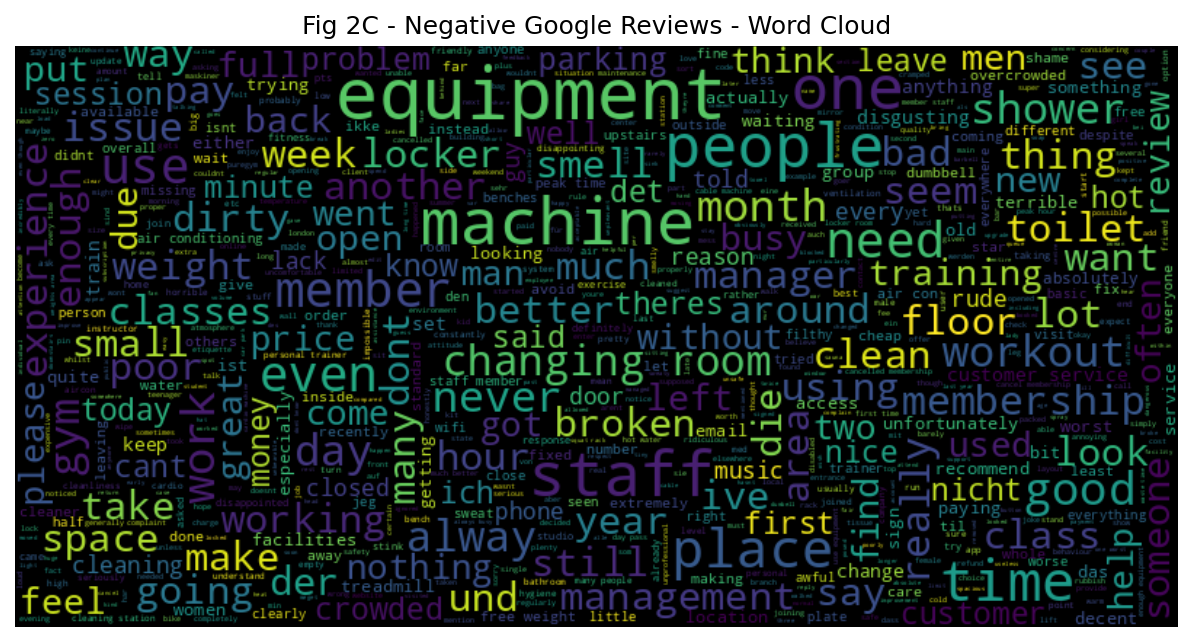

In [ ]:
wordcloud(neg_google_tokens)
plt.title('Fig 2C - Negative Google Reviews - Word Cloud')
wordcloud(neg_trustpilot_tokens)
plt.title('Fig 2D - Negative Trustpilot Reviews - Word Cloud')

##Conducting Initial Topic Modelling

In [ ]:
#filter to only common locations
df_neg_google_common_loc = neg_google_reviews[neg_google_reviews['location'].isin(common_locations)].astype(str)
neg_google_common_loc_list = df_neg_google_common_loc['review'].tolist()
df_neg_trustpilot_common_loc= neg_trustpilot_reviews[neg_trustpilot_reviews['location'].isin(common_locations)].astype(str)
neg_trustpilot_common_loc_list= df_neg_trustpilot_common_loc['review'].tolist()
#merge reviews
all_neg_common_loc_df=pd.concat([df_neg_google_common_loc['review'],df_neg_trustpilot_common_loc['review']]).to_frame(name='review').astype(str)
all_neg_common_loc_list = neg_google_common_loc_list + neg_trustpilot_common_loc_list

In [ ]:
def preprocess_bert(review_list, extra_stopwords=None):
    stop_words = set(stopwords.words('english'))
    if extra_stopwords:
        stop_words = stop_words.union(set(extra_stopwords))

    cleaned_reviews = []
    for review in review_list:
        review = review.lower() #convert to lower case
        review = re.sub(r'[^\w\s]', '', review)  # remove punctuation
        review = re.sub(r'\d+', '', review)      # remove digits

        tokens = word_tokenize(review) #tokenise the data
        filtered_tokens = [w for w in tokens if len(w) > 2 and w not in stop_words]

        cleaned_review = ' '.join(filtered_tokens)
        cleaned_reviews.append(cleaned_review)

    return cleaned_reviews
all_neg_reviews_clean = preprocess_bert(all_neg_common_loc_list, extra_stopwords={'gym'})
print(all_neg_reviews_clean[:2])

['many students two local colleges leave rubbish changing rooms sit like canteen going years cancel membership group disgusting students hanging around machines messing around like school crowded ceo supports genocide civilians israel disgusting people', 'current member quite dirty often theres soap bathroom zero airflow like sauna also often overcrowded anytime good thing location bring buddy thing']


In [ ]:
#run BERTopic using count vectorizer
model = BERTopic(verbose=True)
model.fit(all_neg_reviews_clean)
topic, probabilities = model.transform(all_neg_reviews_clean)

2025-07-12 06:20:41,643 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/124 [00:00<?, ?it/s]

2025-07-12 06:22:54,759 - BERTopic - Embedding - Completed ✓
2025-07-12 06:22:54,762 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-12 06:23:38,417 - BERTopic - Dimensionality - Completed ✓
2025-07-12 06:23:38,419 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-12 06:23:38,621 - BERTopic - Cluster - Completed ✓
2025-07-12 06:23:38,629 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-12 06:23:38,853 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/124 [00:00<?, ?it/s]

2025-07-12 06:25:29,492 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-07-12 06:25:29,508 - BERTopic - Dimensionality - Completed ✓
2025-07-12 06:25:29,510 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-07-12 06:25:29,754 - BERTopic - Cluster - Completed ✓


In [ ]:
#print out top topics and document frequencies
model.get_topic_freq().head(10)

Topic  Count
1      -1   1663
5       0    230
2       1    179
6       2    149
12      3    116
15      4     96
22      5     95
25      6     81
48      7     76
39      8     74

In [ ]:
#print out top words for first topic
model.get_topic(0)

[('weights', 0.04170410871088422),
 ('weight', 0.02504185997753291),
 ('machines', 0.02390706052128013),
 ('bench', 0.021762008253288934),
 ('free', 0.02001518195117547),
 ('equipment', 0.016731970754724393),
 ('racks', 0.01666427154920137),
 ('enough', 0.016172778197840177),
 ('dumbbells', 0.015722729131062842),
 ('layout', 0.015702809537820186)]

In [ ]:
#print out top words for second topic
model.get_topic(1)

[('air', 0.067405505142408),
 ('conditioning', 0.04238262801090914),
 ('hot', 0.034437906204511835),
 ('aircon', 0.030495632099824706),
 ('con', 0.028180578612226333),
 ('summer', 0.02263164676137593),
 ('heat', 0.022007643225440552),
 ('temperature', 0.019732356787605616),
 ('warm', 0.018868496315468514),
 ('working', 0.018474348054925822)]

In [ ]:
#create a visualisation for the cluster of topics
fig = model.visualize_topics()
fig.update_layout(
    title={
        'text': 'Fig 3C: Topic Clusters',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    }
)
fig.show()

In [ ]:
#view top 5 words for topics
fig = model.visualize_barchart()
fig.update_layout(
    title={
        'text': 'Fig 3A: Top 5 Words per Topic in Negative Reviews',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    }
)
fig.show()

Top topics and their themes:
*   Topic 0: Equipment problems - condition of gym equipment, especially weights and machines.
*   Topic 1: Air conditioning - suggests uncomfortable temperatures.
*   Topic 2: Classes - complaints about availability and cancellations.
*   Topic 3: Parking - issues around parking convenience and/or charges.
*   Topic 4: Opening hours - concerns about closures.
*   Topic 5: Showers - suggesting water temperature is not hot enough.
*   Topic 6: Cleanliness - particularly related to toilets and changing rooms.
*   Topic 7: Membership problems - presumably difficulty cancelling/suspending.


In [ ]:
#view similarity matrix
fig = model.visualize_heatmap()
fig.update_layout(
    title={
        'text': 'Fig 3B: Topic Similarity Heatmap',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    }
)
fig.show()

##Performing further data investigation

In [ ]:
#most negative google reveiew locations
neg_google_reviews.groupby('location')['review'].count().sort_values(ascending=False).head(20).reset_index()

location  review
0           London Stratford      59
1        London Canary Wharf      26
2            London Woolwich      26
3             London Enfield      25
4       London Swiss Cottage      24
5       London Palmers Green      22
6     Birmingham City Centre      21
7         London Leytonstone      21
8                 New Barnet      20
9    Peterborough Serpentine      19
10                 Wakefield      19
11        Bradford Thornbury      19
12             London Hoxton      18
13      London Seven Sisters      18
14       Walsall Crown Wharf      18
15              London Hayes      17
16  Manchester Exchange Quay      17
17              Bachenbülach      17
18         London Bermondsey      16
19        Nottingham Colwick      16

In [ ]:
#most negative trustpilot reveiew locations
neg_trustpilot_reviews.groupby('location')['review'].count().sort_values(ascending=False).head(20).reset_index()

location  review
0     Leicester Walnut Street      50
1                         345      45
2              London Enfield      23
3            London Stratford      22
4                     Burnham      20
5               London Ilford      18
6           London Bermondsey      18
7                  Maidenhead      16
8        London Seven Sisters      16
9                London Hayes      16
10            London Finchley      16
11                       York      16
12                  Northwich      15
13       London Swiss Cottage      15
14  London Hammersmith Palais      15
15              Dudley Tipton      14
16         Bradford Thornbury      14
17        Watford Waterfields      14
18                    Telford      14
19     Birmingham City Centre      14

There is some overlap in locations, and a large majority of negative reviews are within the london area. However, they likely have a higher number of members. However, 2 of the top locations in the google reviews are London Canary Wharf and London Woolwich, which do not appear in the trustpilot sample.

In [ ]:
#merge the datasets to see the total number of negative reviews across trustpilot and google
neg_google_review_loc_count = neg_google_reviews.groupby('location')['review'].count().sort_values(ascending=False)
neg_trustpilot_review_loc_count = neg_trustpilot_reviews.groupby('location')['review'].count().sort_values(ascending=False)
neg_review_count = pd.concat([neg_google_review_loc_count,neg_trustpilot_review_loc_count],axis=1).fillna(0).reset_index()
neg_review_count.columns = ['Location', 'Google', 'Trustpilot']
neg_review_count['Total']=neg_review_count['Google']+neg_review_count['Trustpilot']
neg_review_count.sort_values('Total',ascending=False,inplace=True)
neg_review_count

Location  Google  Trustpilot  Total
0             London Stratford    59.0        22.0   81.0
58     Leicester Walnut Street    11.0        50.0   61.0
3               London Enfield    25.0        23.0   48.0
470                        345     0.0        45.0   45.0
4         London Swiss Cottage    24.0        15.0   39.0
..                         ...     ...         ...    ...
438           Basel St. Johann     1.0         0.0    1.0
440   278 - Kolding, Agtrupvej     1.0         0.0    1.0
441                      Selby     1.0         0.0    1.0
442  217 - Vanløse, Skalbakken     1.0         0.0    1.0
538        Stratford upon Avon     0.0         1.0    1.0

[539 rows x 4 columns]

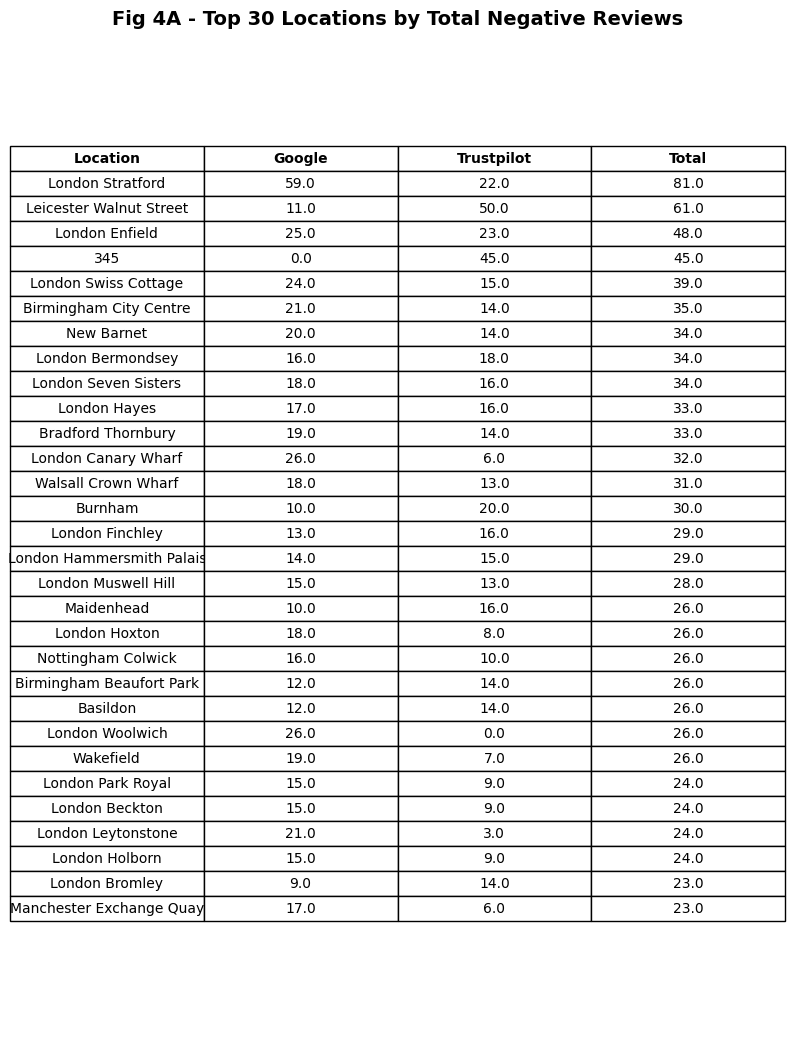

In [ ]:
import matplotlib.pyplot as plt

# Select top 30 negative reviews
neg_review_count_report = neg_review_count.head(30)

# Adjust figure size based on row count
row_count = len(neg_review_count_report)
fig_height = max(1, row_count * 0.4)
fig, ax = plt.subplots(figsize=(10, fig_height + 1))  # Add extra space for title

# Turn off axes
ax.axis('off')

# Create table
table = ax.table(
    cellText=neg_review_count_report.values,
    colLabels=neg_review_count_report.columns,
    loc='center',
    cellLoc='center'
)

# Style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Make column headers bold
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')

# Add title
plt.title("Fig 4A - Top 30 Locations by Total Negative Reviews", fontsize=14, weight='bold')

# Save with tight bounding box
fig.savefig("negative_review_table.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
#recalculate word cloud and frequency for top 30 negative lovations
top_neg_review_locs = neg_review_count['Location'].head(30)
top_neg_review_locs

0               London Stratford
58       Leicester Walnut Street
3                 London Enfield
470                          345
4           London Swiss Cottage
6         Birmingham City Centre
8                     New Barnet
18             London Bermondsey
13          London Seven Sisters
15                  London Hayes
11            Bradford Thornbury
1            London Canary Wharf
14           Walsall Crown Wharf
76                       Burnham
42               London Finchley
32     London Hammersmith Palais
30           London Muswell Hill
77                    Maidenhead
12                 London Hoxton
19            Nottingham Colwick
50      Birmingham Beaufort Park
52                      Basildon
2                London Woolwich
10                     Wakefield
29             London Park Royal
25                London Beckton
7             London Leytonstone
27                London Holborn
100               London Bromley
16      Manchester Exchange Quay
Name: Location, dtype: object

In [ ]:
#extract reviews in top 30 worst locations only
df_neg_trustpilot_worst_loc= neg_trustpilot_reviews[neg_trustpilot_reviews['location'].isin(top_neg_review_locs)].astype(str)
df_neg_google_worst_loc = neg_google_reviews[neg_google_reviews['location'].isin(top_neg_review_locs)].astype(str)

Text(0.5, 1.0, 'Top 10 Words in Trustpilot Reviews - Worst Locations')

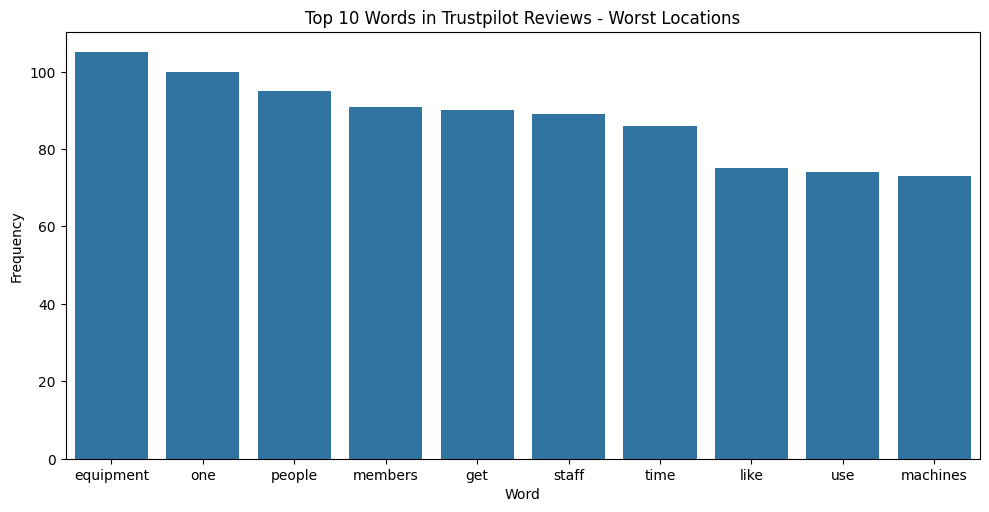

In [ ]:
#preprocess data and run for top 30 worst locations
#plot top 10 words in google reviews
freq_dist(preprocess_text(df_neg_google_worst_loc,'review'))
plt.title('Top 10 Words in Google Reviews - Worst Locations')
#plot top 10 words in trustpilot reviews
freq_dist(preprocess_text(df_neg_trustpilot_worst_loc,'review'))
plt.title('Top 10 Words in Trustpilot Reviews - Worst Locations')


Text(0.5, 1.0, 'Negative Trustpilot Reviews - Word Cloud')

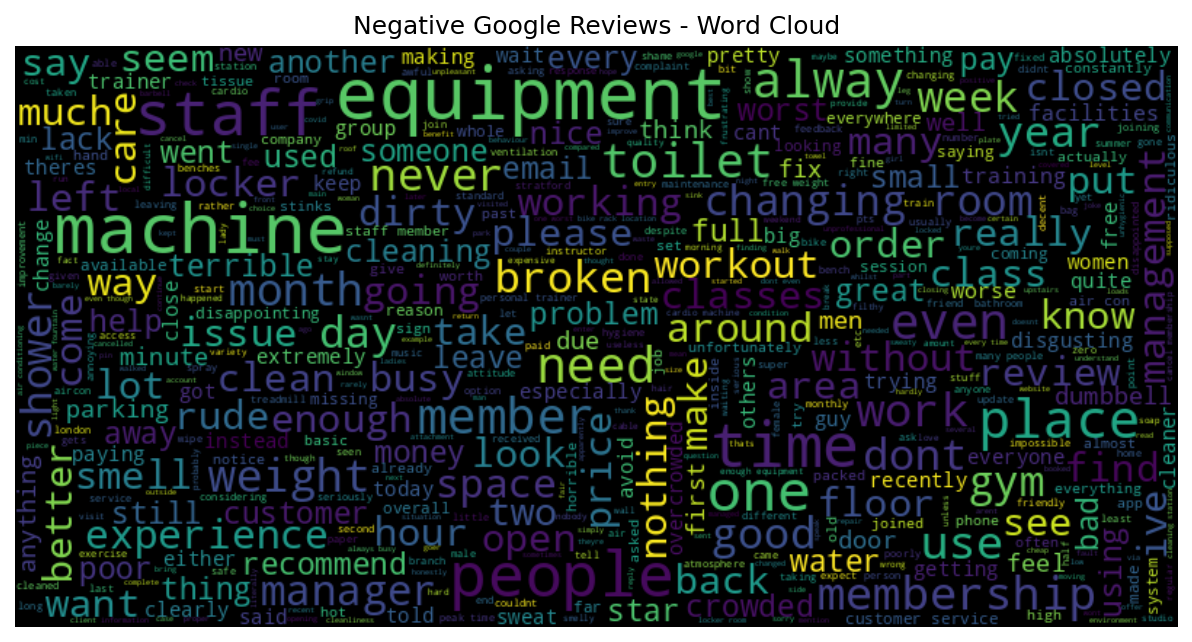

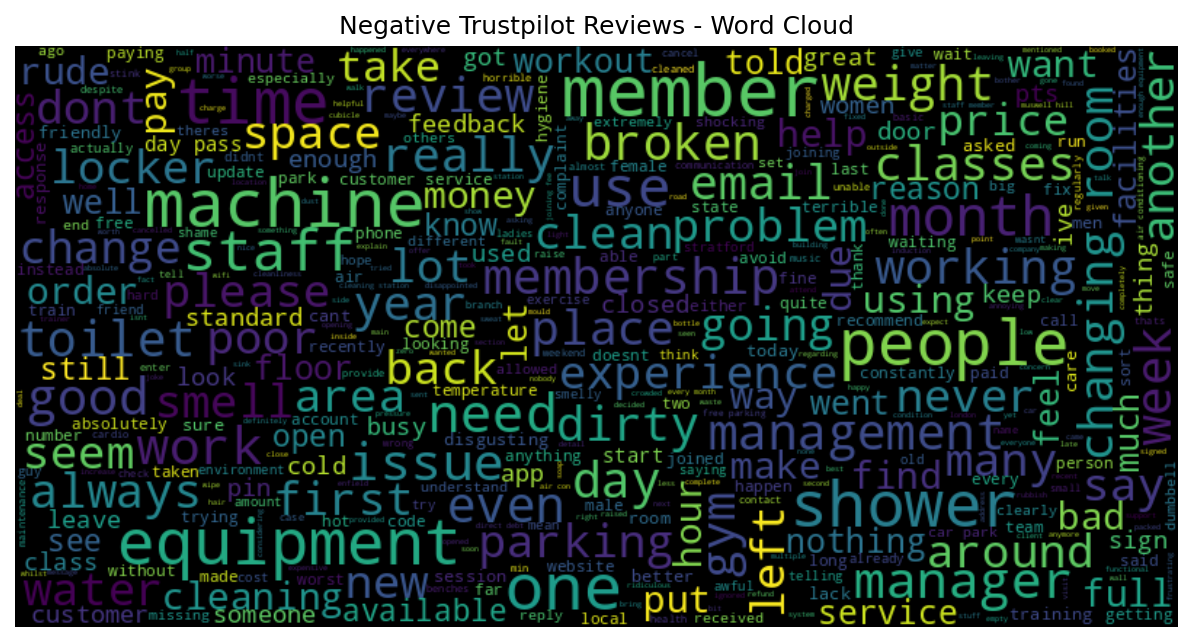

In [ ]:
wordcloud(preprocess_text(df_neg_google_worst_loc,'review'))
plt.title('Negative Google Reviews - Word Cloud')
wordcloud(preprocess_text(df_neg_trustpilot_worst_loc,'review'))
plt.title('Negative Trustpilot Reviews - Word Cloud')

Results are not widely dissimilar from the initial results, particularly in the word frequency distribution, equipment, machines and staff are understandably common across all. The word clouds show more prominent negative words such as dirty, bad, broken, smell and rude.

In [ ]:
#combine results and run through BERTopic again
all_neg_worst_loc_df=pd.concat([df_neg_google_worst_loc['review'],df_neg_trustpilot_worst_loc['review']]).to_frame(name='review').astype(str)
neg_trustpilot_worst_loc_list = df_neg_trustpilot_worst_loc['review'].tolist()
neg_google_worst_loc_list = df_neg_google_worst_loc['review'].tolist()
all_neg_worst_loc_list = neg_trustpilot_worst_loc_list + neg_google_worst_loc_list

In [ ]:
#preprocess the data using function created earlier for BERTopic
all_neg_reviews_worst_loc_clean = preprocess_bert(all_neg_worst_loc_list, extra_stopwords={ 'gym'})
all_neg_reviews_worst_loc_clean[:2]

['got raped location multiple time wait sorry mean rapped',
 'awful experience joining wont let get buddy membership tried bolt friend websites useless telling whats issue bought expensive day pass end freaked multiple times payment went email pin took ages send absolutely awful discourages greatly using different gyms chain email sent write review also demanding tone rude']

In [ ]:
#run BERTopic using preprocessed data
model_worst_loc = BERTopic(verbose=True)
model_worst_loc.fit(all_neg_reviews_worst_loc_clean)
topic, probabilities = model_worst_loc.transform(all_neg_reviews_worst_loc_clean)

2025-07-12 06:25:42,841 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

2025-07-12 06:26:11,193 - BERTopic - Embedding - Completed ✓
2025-07-12 06:26:11,195 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-12 06:26:13,726 - BERTopic - Dimensionality - Completed ✓
2025-07-12 06:26:13,728 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-12 06:26:13,769 - BERTopic - Cluster - Completed ✓
2025-07-12 06:26:13,774 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-12 06:26:13,840 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

2025-07-12 06:26:40,955 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-07-12 06:26:40,962 - BERTopic - Dimensionality - Completed ✓
2025-07-12 06:26:40,963 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-07-12 06:26:40,999 - BERTopic - Cluster - Completed ✓


In [ ]:
#print out top topics
model_worst_loc.get_topic_freq().head(10)

Topic  Count
3       0    174
0      -1    171
5       1    116
2       2    109
1       3     77
7       4     58
4       5     46
6       6     43
13      7     41
9       8     35

In [ ]:
#print out top words for first topic
model_worst_loc.get_topic(0)

[('toilets', 0.028522509639039916),
 ('cleaning', 0.02675574708369423),
 ('dirty', 0.024793956960879805),
 ('equipment', 0.02253625713284801),
 ('toilet', 0.022444912234326722),
 ('staff', 0.019923979759750493),
 ('machines', 0.019744580179999065),
 ('smell', 0.019708258907452664),
 ('changing', 0.019441825230428207),
 ('members', 0.018409750924019988)]

In [ ]:
#print out top words for second topic
model_worst_loc.get_topic(1)

[('machines', 0.0636939878195625),
 ('machine', 0.04850839461895582),
 ('weights', 0.04578250349161875),
 ('equipment', 0.04472203051640892),
 ('broken', 0.03391190740528116),
 ('weight', 0.03307891997118988),
 ('people', 0.028730252168336745),
 ('one', 0.024264658573609835),
 ('free', 0.023989540947338198),
 ('busy', 0.023219014913207204)]

In [ ]:
#create a visualisation for the cluster of topics
fig = model_worst_loc.visualize_topics()
fig.update_layout(
    title={
        'text': 'Fig 4C: Topic Clusters - Top 30 Locations',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    }
)
fig.show()

In [ ]:
#view top 5 words for topics
fig = model_worst_loc.visualize_barchart()
fig.show()

In [ ]:
#view similarity matrix
fig = model_worst_loc.visualize_heatmap()
fig.update_layout(
    title={
        'text': 'Fig 4B: Topic Similarity Heatmap - Top 30',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    }
)

#make x-axis labels horizontal
fig.update_xaxes(tickangle=90)

fig.show()

There are much fewer outliers in this second run of BERTopic. The topics listed are very similar, though in differing order of importance. One topic that comes much higher up this time was around staff/management and rudeness. Another topic is what I presume to be access/contact problems in topic 4, where words such as pin, code and pass appear frequently.

BERTopic recquires a large amount of data for optimal performance, therefore when initially running BERTopic for the top 30 worst locations it only produced two topics, with 98% in one. It needed fine tuning in order to create coherent topics, which suggests maybe there was not enough data.

##Emotion Analysis

In [ ]:
#import BERT model bhadresh-savani/bert-base-uncased-emotion from hugging face and set up a pipeline for text classification
classifier = pipeline("text-classification", model='bhadresh-savani/bert-base-uncased-emotion', return_all_scores=True)

config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
#run a test prompt and see emotion classifications
test_prompt = "I love to hate the gym"
emotion_labels = classifier(test_prompt, )
emotion_labels_sorted = sorted(emotion_labels[0], key=lambda x: x["score"], reverse=True)
print(emotion_labels_sorted)

[{'label': 'anger', 'score': 0.994631290435791}, {'label': 'sadness', 'score': 0.003336412599310279}, {'label': 'fear', 'score': 0.0006590215489268303}, {'label': 'love', 'score': 0.0005945093580521643}, {'label': 'joy', 'score': 0.0005176005652174354}, {'label': 'surprise', 'score': 0.00026126712327823043}]


In [ ]:
#find out top emotion for each review in google and trustpilot datasets
top_emotion = pipeline(
    "text-classification",
    model="bhadresh-savani/bert-base-uncased-emotion",
    return_all_scores=False , # only get the top label,
    truncation =True # running initially without did not work as tokens were too long
)

# apply to each review in the trustpilot dataset
df_trustpilot['top_emotion'] = df_trustpilot['review'].apply(lambda x: top_emotion(x)[0]['label'])

# apply to each review in the google dataset
df_google['top_emotion'] = df_google['review'].apply(lambda x: top_emotion(x)[0]['label'])

Device set to use cpu


In [ ]:
#filter dataset to negative reviews only and extract top emotion
combined_emotions = pd.concat([
    df_trustpilot[df_trustpilot['score']<3]['top_emotion'],
    df_google[df_google['score']<3]['top_emotion']
    ])

In [ ]:
combined_emotions = combined_emotions.dropna()
#find counts of each emotion of negative reviews
emotion_counts = combined_emotions.value_counts().sort_values(ascending=False)
emotion_counts

top_emotion
anger       2772
sadness     1510
joy         1480
fear         368
love          99
surprise      64
Name: count, dtype: int64

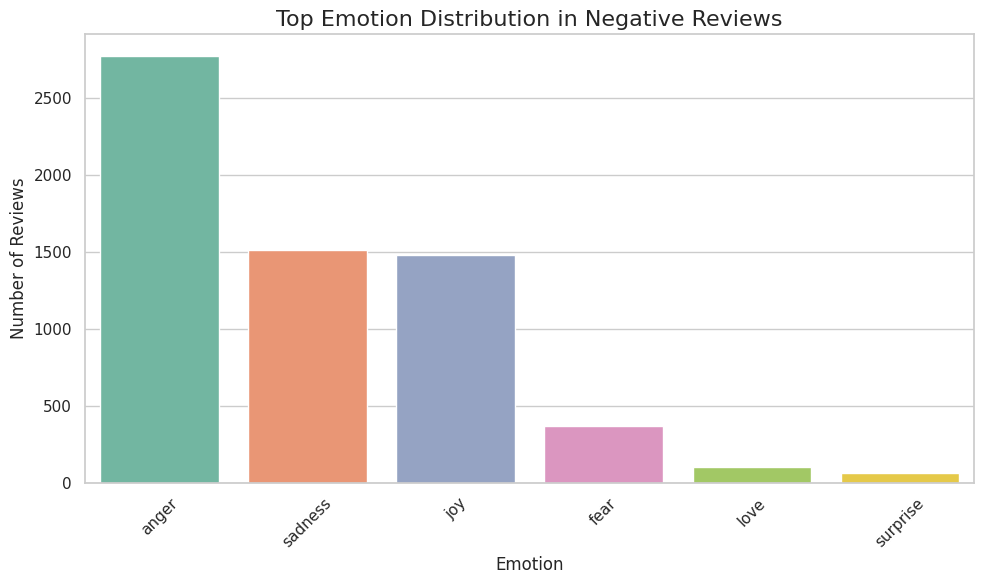

In [ ]:
# plot bar chart for top emotion distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="Set2")

plt.title("Top Emotion Distribution in Negative Reviews", fontsize=16)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#get negative reviews from google and trustpilot where top review is anger
anger_reviews_trustpilot = df_trustpilot[(df_trustpilot['top_emotion']=='anger')&(df_trustpilot['score']<3)]['review']
anger_reviews_google = df_google[(df_google['top_emotion']=='anger')&(df_google['score']<3)]['review']

In [ ]:
#preprocess data as before to be able to run BERTopic on negative angry reviews
anger_reviews_trustpilot_list = anger_reviews_trustpilot.tolist()
anger_reviews_google_list = anger_reviews_google.tolist()
all_anger_reviews_list = anger_reviews_trustpilot_list + anger_reviews_google_list

#preprocess the data using function created earlier for BERTopic
all_anger_reviews_clean = preprocess_bert(all_anger_reviews_list, extra_stopwords={'gym'})
all_anger_reviews_clean[:2]

['payed twice still didnt get day pass',
 'best experience week day bought day pass received receipt access code walked delivery guy couldnt find anyone works help walked like three round without result tried leave possible leave needed code money spare would urge everyone pay bit get service another']

In [ ]:
#run BERTopic using count vectorizer
anger_model = BERTopic(verbose=True)
anger_model.fit(all_anger_reviews_clean)
topic, probabilities = anger_model.transform(all_anger_reviews_clean)

2025-07-09 12:00:42,268 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/87 [00:00<?, ?it/s]

2025-07-09 12:01:55,357 - BERTopic - Embedding - Completed ✓
2025-07-09 12:01:55,359 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-09 12:02:08,114 - BERTopic - Dimensionality - Completed ✓
2025-07-09 12:02:08,116 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-09 12:02:08,214 - BERTopic - Cluster - Completed ✓
2025-07-09 12:02:08,220 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-09 12:02:08,361 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/87 [00:00<?, ?it/s]

2025-07-09 12:03:23,077 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-07-09 12:03:23,088 - BERTopic - Dimensionality - Completed ✓
2025-07-09 12:03:23,088 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-07-09 12:03:23,185 - BERTopic - Cluster - Completed ✓


In [ ]:
#create a visualisation for the cluster of topics
anger_model.visualize_topics()

There are multiple clusters of topics, with a few large circles indicating dominant topics. The large topic includes all german words, which suggests these should either be translated or removed from analysis.

##Using an LLM from Hugging Face

For this section I switch to use GPU

In [ ]:
!pip install -q transformers accelerate einops  #install recquired packages

In [ ]:
#set random seed for reproducable results
torch.random.manual_seed(0)

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM

#load model with GPU support
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-4-mini-instruct",
    device_map="cuda", #load across available GPUs
    trust_remote_code=True,
    torch_dtype="auto"
)
#load tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-4-mini-instruct")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
#text generation pipeline with a 1000-token output limit
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_length=300, #had to reduce from 1000 due to memory usage
    device_map="auto"
)

Device set to use cuda


In [ ]:
generation_args = {
    "max_new_tokens": 300, #limits the output to 300 tokens
    "return_full_text": False, #return only the topics, not the prompt as well
    "do_sample": False, #removes randomness
}

In [ ]:
#filter to only common locations, as full negative review list did not work on free google colab
df_neg_google_common_loc = neg_google_reviews[neg_google_reviews['location'].isin(common_locations)].astype(str)
neg_google_common_loc_list = df_neg_google_common_loc['review'].tolist()
df_neg_trustpilot_common_loc= neg_trustpilot_reviews[neg_trustpilot_reviews['location'].isin(common_locations)].astype(str)
neg_trustpilot_common_loc_list= df_neg_trustpilot_common_loc['review'].tolist()
#merge reviews
all_neg_common_loc_df=pd.concat([df_neg_google_common_loc['review'],df_neg_trustpilot_common_loc['review']]).to_frame(name='review').astype(str)
all_neg_common_loc_list = neg_google_common_loc_list + neg_trustpilot_common_loc_list
neg_list = []
for review in all_neg_common_loc_list:
  if review is not None:
    neg_list.append(review)

In [ ]:
#loop through all negative reviews, where less than 500 tokens
topics_llm = []
iter = 0
for review in random.sample(neg_list, 400): #had to use a sample due to memory usage
  if len(str(review)) < 500:
    print("review -> ", review)
    #first of all want to list the top 3 topics per each negative review
    messages_2 = [
      {"role": "system", "content": "You work as a data analyst insights guru for a top online gym company and you want to find topics for improvments from customer reviews. You should return these in an array of strings only ['topic 1', 'topic 2', 'topic 3']"},
      {"role": "user", "content": f"In the following customer review interaction pick out the main 3 topics and return them as an array of topics: {review}"},
    ]
    output = pipe(messages_2, **generation_args)

    #create a list
    try:
        topic_list_string = output[0]['generated_text'].replace("'", '"')
        topic_list = json.loads(topic_list_string)
        topics_llm.append(topic_list)
    except Exception as e:
        continue
    torch.cuda.empty_cache() #memory crashes further down so trying to reduce memory usage


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym is severely overbooked, it’s practically impossible not to wait in line for the piece of equipment. Also the is plenty of space in the changing room, however the number of lockers is disappointingly low. Overall because of all the waiting (for the locker and for each equipment) I spent 2x more time in the gym that I usually do.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  New gym and charged you more but dont even have enough lockers here


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  This is the only gym I have ever consistently attended, usually a great atmosphere although inevitably some men hog the equipment for too long. However the horrible smell in the toilets and lack of ventilation has now seeped into the gym itself. Please sort this out or many of us will be cancelling our membership. Just because we’re not in a posh area doesn’t mean we should be treated like what seems to be causing the sewer smell in the gym


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym is not suitable for the amount of people using this gym. It gets far too crowded and there is a lack of equipment, especially down in the weights section. There is only one rack suitable for doing deadlifts and if you’re lucky that it’s available, there are a shortage of plates to use. The facilities are also unclean. I feel the gym has lots of empty space on the upper floor that could be better used for more equipment.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  There are not many crowded places. I ask the employees something, they do not get an answer or they ignore it. they are very indifferent. and I will cancel my membership from the gym.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Small gym….only been once. For the monthly direct debit not sure it is priced correctly/fairly considering other gyms in the area. Locker area was really messy and some equipment could do with a clean down. Gonna continue til end of the month then most likely change location.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Toilets were absolutely disgusting!!! Gym is ok. Definitely not the best Equipment seems tired and old.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I am waiting to join this Pure gym in Stratford center,  but reading all the negative reviews,  it's really put me off. No hygiene in the gym firstly is a big problem.  Rude management and staff that are not helpful.  It's all a big waste of money and time. Such a shame,  that's my local gym close to where I live. I will have to look for somewhere else now. Such bad reviews. Unbelievable and no one is doing anything about improvement either.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The app kicked me out of my membership, so I had to go home to sign back in. It costed me a perfectly good workout.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I’ve been to this gym for about a year now, the changing rooms are smelly even with the refurbishment. Staff rarely smile or say hello.


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  No Changing room. Mixed.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Avoid like the plague! Showers are always cold and they don’t appear to have done anything about it for the past 3 years! People have just got  used to having cold showers. I use the Halifax Pure Gym and the shower temperature is so much better


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  For such a small gym they have tried to fit in too much equipment. The whole gym is intimidating and too busy


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Explanation of my previous feedback: Most of the PTs in this gym are rude, arrogant and don't help you and/or make you feel welcome. One of them is the manager: Stephanie Smith.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Since apparatus has been moved , it is now very cramped . Trying to find grips/ handles for cables takes up too much time . Nowhere to stack free weights ...


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Shower cubicle floors very UNCLEAN  Cubicle Walls also need a good clean  All floors need scrubbing with bleach  Not a pleasant experience to walk around bare foot - in fact another member said they are always like this - never walk around bare foot ????   This is not good


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  PureGym are truly shocking. No customer support and sell day passes for gyms that are closed. Pretty sure that’s called fraud.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  It would be nice to see sanisters/antibacterial wipes/towels by the equipment so they can be wiped before or after each use. I think this is key!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Would be an ok gym if they would tell young boys to come dressed properly (not with trousers hanging down and sitting on equipment with your underwear) or tell the young boys to stop hanging with their hands inside their trousers and then touching the equipment. Otherwise would be proper basic gym nothing fancy


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I wish Puregym would move back into Barrow Road, its been an empty building ever since it had to leave, I dont mind paying a bit more!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  All the equipment, spaces, changing room and everything is nice except the girls who come for (showing) not training.  I go into the gym and it's like I'm in a bedroom. The girls wear really disgusting clothes, and I didn't come to the gym to see this shirt. There should be more strict standards and rules.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Always messy, Stinks. #free🍉


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  If you are an empty headed numb skull who likes deafening, moronic music, then this gym is perfect for you...do a selfie of your fully tattooed body whilst listening to earth shaking music for neanderthals!!! What's not to love?


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The ladies changing room smell. The drainage is faulty. Some of the equipments are faulty. The list could go on.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  There are many lazy people who are unable to put the weights back in their place after use!  They don't take care of the tools!  Many people only use their phones while someone else is waiting for them!  The toilet is dirty.  You have a device that you have not used for more than a month!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Terrible hygiene standards at this gym, with staff more focused on their own workouts than maintaining the facility. The restroom is constantly unpleasant, lacking proper ventilation and air fresheners. As evident in the video, this gym is seriously lacking in maintenance.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  As soon as you enter the gym you're overwhelmed by the smell of sweat - on a daily basis. What are the cleaners doing? There's no AC - whats that about? After 10 minutes inside the gym you can't wait to get out of there for fresh clean air. From 8pm onwards kids who most definitely are not 16, more like 14 have taken over the place. NOBODY returns the weights. Not many reasons to continue the membership here in all honesty - its a tip.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Machines are constantly malfunctioning. Please, finally fix the leg machines! They have been out of order for more than six weeks in a row! Unbelievable.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Whilst working away, booked a 'day pass' for the Widnes gym. Arrived to find the gym was closed for a refurb. Very disappointed that it allowed me to book online for a gym that was actually closed. Only plus, was the nice lady (member of staff) who got me a refund on the spot. No compensation for my wasted time or mileage.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Air-conditioning is not working and has not been for weeks now, and the machines are outdated and often broken. I emailed the gym and they didn't reply, and I note that on trust pilot they only reply to positive feedback.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym is far too hot to work out in! Feel faint. It's too stuffy. No air and no ventilation. Awful! Please turn the air con on in the summer. Prices have increased yet no air con and no TV s on anymore.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Unmanned gym. Terrible smell. Poor lighting


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Got charged twice couldn’t get a refund gym was small and machines weren’t the best. However only plus was staff was really nice


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Over priced


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Grim gym.The worst PureGym I have been to.Full of teenage boys.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Cold showers.  Please stop saying the temperature is set to 33. Instead, be pro active and go and take a shower. They are far too cold.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The staff at this gym are unbelievably rude and unprofessional.
The assistant manager there looks down at people. One of the "personal trainers" there kept making sly comments to me when walking past. I tried speaking to the manager and higher up but no one seems to care.If you are shy or anxious this gym is really not for you.

The gym itself is alright and at a good price but the staff there ruin it.
Definitely wouldn't recommend especially for women.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym was good. However there was a leak at the water fountain and the ground floor had a really bad smell of vomit.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  2nd morning this week where no instructor has turned up!  Gym is a state weights everywhere! Place is a mess … classes are poor - questioning what I’m paying for.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Puregym is says we're 24/7 that means when you're gym member you can go any days, any time and the reason I joined is simply for that hoa ever now they started to closed the gym from 4pm on Xmas eve till  Xmas day will reopen boxing day they  is misleading the customer and they will never telling you this. This is cone way


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Over memberships. All ways busy too many annoying kids.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I've been going to this gym for 3 years because it's close to my home but I won't suggest it . It's too busy no ventilation , machines broken for a while . I can't find free machine for doing exercises easy.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Some practice without clothes. The permanent absence of a manager in the club. Old and broken gym equipment. Lack of fitness equipment. Very bad smell inside the locker room


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The new building is nice but there is not enough parking, parking was much better when the gym was located within the kingfisher.

Too many people in there, I am not exaggerating when I was there was a not a single piece of weight equipment left or space to use the free weights.

Unless you can come in during regular working hours don't bother coming here.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  No saunas...sad times :(


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Looking closer to a maze rather than a gym, damp smell everywhere, a constant leak held by 2 buckets on the ground floor, stretching area is quite tiny, and a cold shower to complete the lot!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Heavily overcrowded. There should be a limit to the capacity. Due to it I would give 1star, but giving two as the rest of the stuff is fine.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Not enough parking.
Location less convenient.
Not enough equipment.
Equipment is laid out in a nonsensical way.
Equipment is unsafe as not bolted to floor.
To busy.
Music to loud.
Prices raised again.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  One of the worst pure gyms I’ve been especially considering the high monthly membership for this gym. There is poor ventilation, AC doesn’t work and now there is fly infestation in the changing rooms. Management needs to really listen to the feedback provided by the members and take action on it!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym is decent but gets way too hot, but the changing room is dirty and the showers are even worse. After my first visit I have decided to cancel my membership, that should say it all


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Gym is small but clean. The showers are so cold though (after a workout). Reported numerous times but nothing has been done. The shower head is for anyone that would be 9 feet tall so maybe they would benefit from the heat.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  2024 update... no change and obnoxious music from instructors.

Gym is as you expect but music makes it unbearable to work out here.

If you like headaches and tinnitus this might be the gym for you

Update: Moving to 1 star as it's getting worse! Especially when classes are on blasting music while the regular gym music is going


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  7 day suspension because individuals from before left weights on the floor, no warning straight suspension. Absolutely shocked. Pure gym moto everyone welcome... I sure don't feel welcomed.   1. No prior warning before suspension.   2.  Personal Trainer working 5am didn't say a polite word to us if we did anything wrong.   3.  No induction  Didn't even receive a apology when we went in, it had only been two days at the gym then suspension.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I purchased a 3 day pass for the wrong gym, and nobody was available to fix the issue. Now I am waiting to be refunded, but have not heard from anyone. I have reached out by email and Facebook messenger.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Staff are ignorant and have a attitude issue. Always packed no matter what time you go! Cardio machines need a desperate upgrade! Free weights room is always packed like a pack of sardines!! Over the years this gym is going down hill!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Do not use this gym on a day pass, despite following all the rules they issued me a £60 parking ticket. Absolutely scummy behaviour, tantamount to extortion using the legal system as a vehicle to shake down visitors to the area to milk some quick cash. As an online only company there is no recourse to contact anyone and fix the issue. Absolute bullies and abusive of customers.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Used to be better, now many lockers seem broke, broken equipment also is taking months to fix, in the past it seems to be a 2-3 weeks.
Also new members seem to pay a lower monthly but existing members have their monthly price increased.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Pooring place. Used to love it. But now just let down. Unprofessional staff here.  Also make u feel un wanted.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Way too busy! I struggle to get on any machine or even a bench in the free weight. Great gym if you want to do cardio but if you're looking to use the weight machines or free weights, this isn't the gym for you.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym manager has an appalling attitude members, rude, aggressive and abrupt.  It's a shame because the gym has good equipment and the personal trainers are friendly enough.  I have trained in gyms over 20 years, never been spoken to like that. Due to this shockingly poor customer service I have no option to cancel my membership. I did put a complaint in, heard nothing back, which say it al really.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Pure Gym Classes cancelled without any notifications on the app, several members turning up to no instructor. Been happening for the past 5 months with no sign of improvement, diabolical.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Bad smell in changing room


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  hey there
Some one called parm using my code and my friends code in pure gym and he leaked our code to his other friends IDK how is that person and how he got my code but please I can't go to gym for 1 week I  need help to change my code there is no manager there to help and there is no service in gym. I fell like my money got wasted. I hope you listen and help change my code
Thank you


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  cable weights are clearly incorrect and not consistent with other gyms (including puregym)


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Went to a step class on Monday at 5:30. Music system was broken. The instructor attempted to use a portable speaker but connection was weak. Only did 3 routines in 45 minutes because the equipment kept failing. The instructor was very apologetic and tried his best to get the equipment to work.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Hate this place will never go back. Recently came here to train with a friend of mine & had my locker broken into and someone  stole my phone a friend of mine had money taken out of his wallet. Train here at your own risk.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Equipment broken frequently. Constant issues, such as no hot water, out of order toilets. Whenever I go to this puregym, there are always issues. Now there is going to be no hot water for 6 weeks.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I attended as a guest & the pin did not work.  The machines as examples, the jogger & rower weren’t disinfected!!  It’s a fact that COVID isn’t cured so, having paper towels with gel placed in view should the customer need to clean the machines themselves is advised.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  This bicester puregym is the worse management gym in the UK, and everyday it's very packed during peak hour.  Its my personal opinion. so if you are thinking of join them, my advise is considering other better management gym in bicester.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  This gym is getting progressively worse as the months pass. Good selection of equipment but overcrowded and full of kids hanging around in groups. It’s being used as a hangout which makes it difficult to use any equipment unless I come after 10pm. Gym cleanliness is very poor and smells bad. Safety is falling as well, no one puts their equipment back so you constantly have to watch your step to avoid injury.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Busy, non-attended, price increase doesn't reflect gym of this level


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Water fountains are very temperamental, work one day and then they don't the next, changing rooms are always dirty, water facilities in general are temperamental as the showers often do not work. Water in the ladies changing room by the sink has a strong sewage smell.

2 stars because the staff are very friendly and the poor facilities are not their fault.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Always busy


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  PURE GYM BOYCOTTS IM CANCELLING ALL MUSLIMS CANCEL NOW


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  It’s a good gym but there needs to be better management of the groups of people using machines and free weights. It’s getting ridiculous. A group of 4/5 lads on all bench press areas for over an hour, checked back five times. There’s just not enough equipment for the amount of people, it’s getting ridiculous and although it’s good kids have a place to go and are working out, overtaking everything for the time they do is so frustrating for us who have been going there over a year.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Didn't go to this place


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Because it’s cheap it’s full of youn chavs that hog the machines in groups and muscle Mary’s hogging the mirrors


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Would help if theyd update is on how long the gym out for


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  It’s not terrible and the new refurbishment is so much better , however I went to deadlift and somehow had hot air blowing in my face and either side of the platforms are not proper lifting rubber, therefore the floor either side is concave. When deadlifting , the bar is rolling around and falling into literal potholes? The place needs proper platforms as this is unsafe for heavy lifts it throws your alignment out


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Just cancelled my membership. PT showed very aggressive behaviour towards me. Verbal threat about physical abuse.  Raised an official complaint at head office. Guess I just got unlucky with a guy on steroids or serous anger issues. Never again.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Most of the time the changing room is messy
The toilet smells horrible
They have to work more on hygiene


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym equipment  isn't the best! Doesn't compare to other pure gyms they have more and better equipment especially for legs . Very poor!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Too busy often hard to get on the equipment you want


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Walked past it


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I bought a 7 days pass and it only worked one time , I am seldom here for my business visits and wanted to train when I want . I bought 7 day pass for 25 pounds and my money got wasted


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Tiny


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  -- URGENT -PUREGYM --  For some reason I didn't get your message about doing the yoga class that I missed, and I for some reason got a message from you on my calander app, (on mobile number:  07376710997?), so I couldn't reply, but I just managed to read the message now??  NB:  Also I would like to know how you sent me a message to my calander, and I hope this is legal as I would be forced to tell the local POLICE, HA, HA HA??!!  From Emanuel Rodney 07506169884


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Worst experience I have been using gym from 2-3 days but the cables are broken treadmills are not working management don’t care @Puregym team please don’t just do marketing things for your gyms but also try to make them better as we are bot doing gym for free we are paying and we are expecting to get good experience.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The joining was the easy part. Got my code to get in with my buddy who had invited me. Got to the Gym, the code would not work. The gym was not staffed so we could not get any help. We bought a day pass, but my buddy unfortunately typed in an incorrect email by 1 character! So there was no further experiencing Pure gym for me. It just didn't happen. My buddy meant to introduce me to Pure Gym but it wasn't meant to be, it seems.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Few machines.  Basic machines such as chair flexors and open-back articulated pull-ups are not available.  So days are numbered here.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  You can tell by the reviews that the AGM is shitting himself about his reputation which he has ruined himself due to his actions in the gym with females. You can also tell that the "positive reviews" are forced. Especially by the this person who commented the most.   Deeply saddened to know that Puregym is allowing vile behaviour from the AGM and the other creepy PT and are not doing anything about it


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  In tescos never went.....


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Sort the showers out


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Broken light keeps flashing which is very tiring for the eyes and head. WiFi doesn't work on the 1st floor, some machines are broken and the plates and dumbells are scattered all over the place. Impossible to find a working locker.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Big gym with many machines but the big problem is the cleaning, especially the male changing room always stinks very bad, even yesterday that it was Monday so first day of the week, how is it possible that a place smells so bad ? It was so disgusting that I even refused to use the sinks for washing my hands, which it is something bad considering that covid cases are still happening. You could even tell from the state of the floor that the places has not been cleaned


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Today someone stole my jacket from the locker room. I have heard many such stories and opinions, but this was the first time it happened to me.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym equipment is good and gym is spacious. However that's all good I can say. Cleanliness of this gym is appalling. Showers are never clean and they are disgusting. Lots of hair and dirt in the cabins. Same goes with the toilets. The staff is more busy to chat and talk to each other rather than greet customers. Shame that opened recently and management is so bad that the gym has 3.6 rating . It needs improvement.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Worst bench I’ve ever seen


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Not hijaby friendly....


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The equipment is in good condition. Most of the time there are no towels for wiping them down. The shower have not worked for a month plus the hair dryers are in the same state.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Showers - please resolve this long standing issue. 2 available showers for months now. please just call a plumber.......


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Never pay a PT upfront for sessions if the Billericay gym is anything to go by! They will cancel sessions an hour before and agree to pay  money back and then when you cannot rearrange will say ‘PT’s don’t have to refund’. Management did nothing to help our daughter with the refund so do not trust  any PT at Billericay with advance payments.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Some equipments are broken and it’s been a while they don’t fix it


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The message that came through said the pass was invalid, we tried twice and both times the same message was sent This issue needs rectifying immediately as this is part of my son’s membership


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Showers are gross and ice cold, the male staff came once to to female changing room to sign the sheet for cleaning. WiFi doesn't work in most areas. The place can be packed on peak times but staff are limited when you actually need help.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Would like to know why the cleaning spray and paper towels have been removed. So unable to clean equipment before I use. Find this disgusting as touching other people’s sweat. Makes me not want to go anymore.  This is harlow pure don’t know if others the same!!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Needs more bar collars, benchs and racks. Showers would be good also. Slightly below average experience but i only ever use PG if im desperate


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Got over charge 45.99 for no reason and I am not sure how to get my money back


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Far to busy no matter if ur going in at 11pm. Not enough weights or equipment for the number of ppl that use it. Weights are all over the shop just seems like a free for all.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  No Hot Water Regularly!! Regular user of the Halifax gym - and there seems to be a regular problem with providing hot water for showers!! - If you need to raise the monthly payment to include hot water can you please organise this as the temperature of the Hot water is as best tepid...if working at all.. Get your act together.. :(


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Air conditioning doesn't work. Machine are broken.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  No mirrors. Every gym needs mirrors.
Otherwise how will members look at themselves and muscles or whether or not my muscles are contracting properly. So please more mirrors.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Absolute madness, booked classes and went to attend but no one was there to conduct class.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I went to workout with my friends in Wembley PureGym and their lockers were broken into and valuables were stolen whilst we were working out. I would not recommend using this gym at all.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Really stuffy and the equipment is old.

I went at an unstaffed time so because of this it was untidy.

The classes are good but the gym itself is always packed. Plus the air quality inside is awful and I always get lightheaded- not ideal for when you’re exercising.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The pin code you sent me after joining the gym is not working


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Most ghetto gym I’ve ever been to. Things are never repaired and often take them a month or two to fix. Accessible toilet in the Telford Town branch need fixing!!! Take your money and go to a gym that value their customers and don’t take the p1ss when it comes to fixing broken equipment.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The machines are broken- the ceilings are broken-they don't fix them because the ceilings leak.  The studio floor has never had the floor laid properly and has bubbles in it that will trip and kill you as well as the studio being very poorly lit- because they don't want you to see the bubbles on the floor. The front door was broken for almost a year. Only join if its the cheaper than the Gym down the road.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I’ve been coming for a couple months now and the showers are awful freezing cold for first 5 mins then warm up then go boiling and back to freezing - it makes me run late for work every morning and haven’t worked for the 2 months I’ve been going


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  not a PURE anymore, the staff should clean it better. and pay more attention to the cleaning supplies. Very often there is no any cleaning spay on early mornings.
1-7-2023 at 10am no cleaning supplies at only one (for the whole gym) cleaning station, feel disgusted.
As my and others complaint have been continuously ignored,  I will complain to the Health and Safety Authority now


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  VERY FILTHY GYM!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  When will the gym be open again


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Busy, busy, busy it is hard to get a routine with machines being taken up.  Some of the machines are faulty. I kept finding ones that were just beat up. One more point, the cardio room is dull with nothing to look at but the wall.  It appears the place needs about double the space and better machines.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Worst pure I’ve ever been in. If this was my home gym I’d cancel my subscription. Hardly any leg equipment, or equipment in general. 1 shower for all the men to use and even that was cold.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  There is no reception, no doorbell or intercom, no phone number to call, no WhatsApp, nothing.. after 20 min waiting i managed to get the attention of someone working out inside, who called someone… already not a great start.
I was told by a staff member it’s not possible to have a little tour of the gym before joining. I need to check the pictures online and could not be bothered opening the door and showing me the facilities and equipment for 2 minutes. Very disappointed


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Staff are friendly and helpful.there are pieces of equipment that are out of order and have been for many weeks equipment attachments are in need of replacing either frayed and tatty or no hand grips on them and not enough. It's very difficult to access machines and impossible at peak times cannot plan your workout more often just have to use what's available a bit hit and miss .


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Tiny gym with tonnes of regulars and not nearly enough free weights (1 bench press setup) or machines. If it wasn't for the regular long waits for equipment to free up, it'd be alright.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  This place stank of BO and was packed with people. All the machines were out of order could not even get water from the fountain because they were BROKEN!!!!!!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  They banned me but otherwise it’s a decent gym


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The sport drink machine still out of flavours - been like it all week. I pay for this in my membership! The gym is filthy - weights everywhere


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The wifi in the Exchange Quays Puregym is terrible. Please sort it out. I am not from the wifi era so it would have been OK but lack of wifi leaves you exposed to the terrible gym "music"(Horrible covers of classics that should not be touched). And that is why wifi is needed. Either that or 20G on data a month playing your own songs.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Poor!
I know an upgrade is coming soon, but these are not the conditions any gym never should be training on. Respectfully you should be letting all purley home gym members have a month off free whilst you get yourselves together.

Several machines out of action caused congestion.

And where are the mat racks????

The upgrade better be high quality.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Sort the air con please, set too warm, hot stuffy humid sweaty


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Showers constantly cold


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I love Pure gyms but get the feeling this one isn't being run to its fully potential.
It needs cleaning more frequently and loo paper stocking up etc! And there are loads of unused cardio equipment, but for the size of the place very little stretching area or free weights space. Always a queue for bench press and deadlift.

Need more plates and also more safety grips for the free weights.

Missing some good bits of kit that other pure gyms have too (for example assault bikes).


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Good space, good gym equipment,  I wont complain about the toilet use bc thats hard to control when you have hundreds of god-knows-who people flocking in everyday. BUT Why is the hot water so INCONSISTENT?  I paid for the membership that includes the shower and often gets cold water, or if im lucky, a stream of warm water followed by cold water. Do I have to pay for a hot water hours as well???? It's seriously annoying


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Showers are too cold


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  This gym is cold and wet. It’s lovely to have this large windows but you cannot see anything through them due to the condensation. Maybe if the gym was a bit warmer it would happen. I’ve seen people training in their coats this week. Not looking forward to the carpet smelling of mould over the next few weeks


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Full of kids


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Upgrade isn't complete


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  It’s a good gym but gets way way too busy.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Any time there is an issue it takes ages to get fixed, with this heat the gym smells like sweaty and poo :)


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Poorly run gym🙁 lockers always in use as people leave items there overnight and just not a nice atmosphere


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Excellent my backfoot   Dirty & filthy   Saw rat traps   Spiders the size of Aragon in prisoner of Azkaban   Weights all over the gaff  Machines broken for months  Filthy locker rooms   Where’s the mirrors in the cable room   Why is the studio & spinning room closed after 10pm ??!!  I’m Paying for Access to all areas   Don’t reply to emails too   Why can’t I pull 0 stars :(  Been here for years   Those 5 star reviews are scandalous  PureFabrication 👍🏼


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Gym is fine but when a class is on they put the music so loud you can’t hear your own music. I’ve walked out the gym twice now because I can’t listen to my music as the class music is louder than my headphones.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I arrived at the gym and there is no customer service. I clicked on help and there was no response from the gym staff


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Busy


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Dirty not PureGym, with no maintenance of equipment whatsoever.
A Cable mashine was out of use  more than a month.
Now, they decided it is a good idea to block the fire exit.
No wonder why people not staying long with this gym.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Take away the Pure from Gym its joke business with rude staff looking to know themself.  Multi Access joke ting membership running me back compensation for theft and inconvenience or its review people's gym will hold.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The showers are a massive problem. There is something wrong with them every few months. The smell from the sinks in the toilets are also overwhelmingly disgusting. Due to limited cross trainers when even one is out of action it affects a lot of people. But apart from all those things the gym is clean and tidy. All the other equipment is in good working order. Pleasant atmosphere, great class timetable. On a good day I would definitely give it a 5 stars…


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The changing rooms stank of sewage and smelly bum bum. After raising the issue with management no action taken. Still unresolved.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Nightmare.No limits on the number of people present at the gym. Not very clean, weights scattered everywhere   You waste more time waiting than training. I do not recommend


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Honestly , I like the gym and equipment however men do not know how to lower their gaze at all! Has put me off going and I am cancelling my gym membership as I have never felt this uncomfortable at the gym :((


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Below the bare basics


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  In terms of pricing and registration process is good, but the facilities are not kept very clean unfortunately. Unless you don’t mind that


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Not bad considering the price clean but it’s extremely hot inside it feels like in a sauna after you finish your exercise despite the air conditioning in there non of them is working actually the only one working is in the cables area in the left of the entrance i hope they turn them on


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The rudest staff that I’ve ever seen in my life!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Toilets always dirty, full of kids smoking vapes and cigarettes in the locker rooms, barely enough equipment during peak hours. High schoolers shouting around the gym all the time, music from classes extremely loud and can be heard around the whole gym.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Payed for a day pass and did not receive a pin, complete waste of money and no help from staff


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The PIN code that was sent to me didn't work. No phone number to call for someone to assist and the assistant button didn't work.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  No atmosphere, entry system rubbish, some sort of claustrophobic pod, entry code didn't work, had to wait 5 minutes for the staff to let me in. probably one of the worse gyms I have attended,


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Paid almost 2 months ago but still the gyn is still not opened.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Too small and the parking situation is terrible


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The classes are good and most trainers are friendly but the new(ish) manager is quite honestly the rudest, most condescending woman I have ever encountered. She does not encourage a friendly or welcoming atmosphere in the slightest. She is an actively hostile. The way I’ve seen her interact with her PAYING MEMBERS is deranged - who is she accountable to? There is no world in which this woman should be in charge of any service that requires her to interact with humans.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Not enough equipment, very rude staff, absolutely not acceptable costumer service. Better to choose another pure gym.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Closed despite saying it was 24/7 online - apparently closed at 4pm. Only clue as to when it’s closed is a sign on the door…waste of a journey and fuel to get there.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  send me an email with one price and then change it and then back again and back to the other. miss selling. why was I told no your having it full price we have corrected it and that's it ????? I pulled you up 6 times on this and each one saying its this price and then next sorry its this a number of times . !!!! want to sort it then leave me a email to correct this!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Overall it’s just not a a good gym, the lay out is terrible the water dispenser that I pay extra for was out of order. The staff didn’t offer any assistance to me as new member, worse gym I’ve used and will only be using the Plymouth two instead from now on.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I used a discount code for bluelight and aviva and both was not applied. Offer says no joining fee for nhs workers with bluelight and still charged.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The staff are great and the atmosphere is very good. However there is not enough fitness equipment which is a real shame. Sorry pure gym your facilities are normal excellent but this gym does not use the space very well.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Equipment broken for nearly 4 months, reported several times in person & via email, no repairs carried out to date.  Staff are now ignoring my emails. Rude & unhelpful.  Thanks for the reply. The extremely unhelpful staff member seems to think there is nothing wrong with the machine, which is completely ridiculous when it's constantly in error mode - maybe she should try it for herself.   Please get it sorted, it is extremely frustrating.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Despite the gym advertising it is open 24hrs a day 7 days a week this is 'misleading' as it is closed over X mas time, when some people really want to train and forget about the imposed celebrations.  On many an occasion the gym is not staffed so i fail to see why it must be closed over this period.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Members left empty protein shakes and water bottles on the floor even though rubbish bins are provided, gym bags were left in the middle of nowhere for people to trip over. Most of the machines were inacseble due to members just sitting on the machine and always checking there phones


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Unsafe place and robbery happening.
My stuff was  stolen from locked locker and no manager around to take charge .. no staff from pure gym take care of the situation …
contact number does not exist ..
if in case on any accident  no one is there to help you out …


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  When I signed up it says I should get a code emailed through to gain access to the gym but I haven't received anything. When I sent a message via Facebook about this to ask for help, no one got back in touch to help.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The changing rooms and showers smell stale and like mould they need a deep clean ASAP. also people act like filthy animals. A notice needs to go up to inform people of their cleanliness. Some machines are tired and used especially some of the treadmills not having always functioning buttons have to press hard for it to work. Would love to see mainly the changing rooms cleaner 😁


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I have a friend who has went here and has complained about guys harassing her, from a staff member recording her to another guy even trying to follow her home. It’s sad when you find a gym that has the equipment you like but the management can’t do the bare minimum of ensuring the clients that fund their business feel safe. If you’re a female, beware of this gym and take extra precaution when leaving.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  It stinks from the entrance. The whole first level stinks with various degrees . Then the lower level is very stuffy, so the ventilation is rubbish on both levels. I just left as it was very unpleasant.
I won't be back here. Otherwise, it would be an Ok gym.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  no radio, no air conditioning


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Absolutely rubbish. Dirty site which hasn’t had any new kit for years. Quit as I was sick of everything being brown.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Gym is dirty and the equipment quality is bad and could cause injury.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Disappointing. Lots of equipment was ‘out of order’ which meant the equipment that was working had queues of people waiting. Despite arriving at 05:20 the gym was busy


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Worst gym ever! Worst customer service! No manners or respect!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Its an okay little gym fair priced however, Be very careful about the parking I have just received a £100 parking fine from 3 months ago! and if there's a fault with the tablet or you take longer then 10min they will still issue a fine. This has happened to so many people.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Full of kids and people who never put the weights back and pretend to use machines but they spend time on their phone. Even vaping in the changing rooms. Staff don't care less.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Unacceptable temperature control in Pure, Aylesbury. On your website you pride yourself with keeping us safe yet in the start of summer no AC or at least fans! I sure hope nobody collapses from heat exhaustion given your failure to resolve this. We are paying customers, yes it a cheap gym but you need to comply with health and safety regulations! Bring back the fans or sort the AC


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Worst gym I’ve ever been to in my life and I and a regular gym user. Staff are useless,  it’s absolutely hectic, a large space with no equipment. Too many member for machines or benches.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Didn't het a refund for not use pass


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Don't come here please it's too busy. Also they have employee's, obviously, and when I'm finished with the equipment I leave it. And then they tell me to tidy it up. Seriously. I pay for an expensive membership and they expect me to do the labour for them. How about you pay me then. Then they come up to aggressively to try to make me to tidy whilst they lazy sacks are at there desk on their phone more than half of the time. The manager is the worst


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  High heating on in the gym. About as helpful as a porcupine in a condom factory.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Little equipment, benches ect. It’s a small gym and shows. I only use it when in the area as my home gym is located in a different part of the country. Wouldn’t use this gym if it was local. Needs more machines updated equipment.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The state of the showers in this Gym are unhygienic and utterly disgusting, regardless of timing they are dirty and full of pubes. I have showered early morning and evening and they never appear to be properly cleaned


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Totally overcrowded and particular areas are never free. Don’t waste your time. Clearly not catering to the membership.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Typical PureGym experience.
No atmosphere, lack of knowledge staff/PTs, basic kit and pretty poorly run.

It's a shame that gyms like Bulldogs/TGM were effectively driven out of business by these cynical big chains.
PureGym may be convenient, but they are the Wetherspoons of the fitness industry.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  This place seriously needs some air! If you like the smell of cheese, sweaty arm pits and balls, this is the place for you!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  What is this i do gym in castle marina i got this ticket for parking in pure gym parking… i am not paying a single penny….


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  This is the worst gym ever. To be specific the one in Chester has a very low standard. Hygiene wise 0. Maintenance is -10. One of the leg press has been broken for over 5 months now. Gym equipments are very rusty. Some of the bars are so bad that you wonder if they have recycling value. You even lucky if you use the toilet and the hand dryer comes on.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Staff all seem decent and friendly enough however some people who attend this gym spoil it for others, over the past few months the showers have included puddles of urine, cigarette waste and faeces, and with the removal recently of the cleaning stations it makes the gym hygenically unsafe to attend. Also avoid paying extra for the Zenga water machine as flavours are regularly empty.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym is impossibly busy - I spent 5 min and left


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  It’s okay. It bluntly does what it says on the tin, sort of. The stench from the toilets is quite unbearable, though — vomit inducing! Sort the toilets out and it might be 2.5 stars.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  What can I say.  I have a home gym in the West Midlands. This place is bad. We ha e gym etiquette whereby members have to put back the dumbbells back in their correct places not expect others to put them back. If I  did not do this at  my home gym I would run  the  risk of  my membership being suspended.  Why do you not have the same policy
? And also there is a lot of  equipment that  is out of order. Come on people you can do a lot better.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I was about to buy membership, and the monthly price is crazy 🤯 Membership Stirling 15.99, Alloa 25.99 plus fee 15£ 🤣🤣🤣🤣🤣🤣🤣🤣
JOKE !!!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The facility was in adequate and not clean


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Big improvement and affordable membership however classes are short and basic not driving individuals to own limits. I attended two different classes same day different names- set up and exercises were exactly the same. Also too many members for amount of equipment available at peak times


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Things has to change on this gym otherwise people will leave for good I been there for almost 7 years the last 2 years is getting worse no water in machine or tap I have to buy water to workout I'm very disappointed never experience anything thing like that before no one cares except manager Assistant


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  No staff to help First time coming and felt overwhelmed  Wanted to do a class but couldn’t due to this


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Wheelchair users beware. Despite the fact that my husband is paralysed and therefore cannot use half the gym equipment, he is still expected to pay full price for membership. PureGym, it's a shame that you are unprepared to give people who need the support some help with rehab at a fair price for their ability.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Its been more than one month now that there is no water inside the changing room and the gym has leaks from the rrof in the middle of the free weights section. Disappointed.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Just go to JD Gyms also this is another establishment that enjoys robbing their vulnerable customers through direct debit, I have been robbed of £100 from this company.

When a similar thing happened with JD, they happily refunded me but Pure Gyms website has very detailed policies about not giving their money back so I doubt they will be as kind as JD.

As if they don’t make enough money.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Dear influencers- can you stop using the kit to store/ set up  your filming equipment ? Dont be cheap - buy a camera tripod or something.  You realize other people need to use the gym  equipment too? It’s not for filming your training sessions


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Just passing by


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  was not very impressed by neither the customer service (no one bothered to open the door when as a first time visitor rang the bell for 15 min) nor by the gym itself (very crowded and poorly equipment)


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Fine for cardio work, but weight machines are frequently out of order, not enough bench stations, dumbbell's are usually in the wrong places and finding the right ones can take a while as weight area is usually a mess. Treat new members a lot better than existing ones with better deals etc. Overpriced imo


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  What is going on with this Rochdale PureGym??? Sunday eve (18th February) yet again stone cloud showers. Not even a hint of warmth.  Ok, I appreciate many gym goers don't use the showers (yeah, they must stink when they get home or wherever they're going to... if they've had a proper work out like I do), but surely those of us who do take care of our hygiene deserve the shower facilities we're paying for?


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Went for an induction and being on the larger size it soon became apparent I was not a new member they wanted , I was made to feel small  talked at and not with I can only say this was one guy so I can't comment on the rest but definitely would not recommend for any larger person


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The showers were freezing cold with very low water pressure at my last visit. I couldn't speak to anyone at the time as there wasn't a member of staff in the building. This was at 5pm on a Saturday as well! I have tried to contact them using email and fb messenger to report the issue and get it fixed, but all I got was unhelpful automated responses that have nothing to do with the issue.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Just paid a day pass and waited an hour to get my code outside in the cold. No staff no telephone contact and local messages what stupid system I wont be going back.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  For how long do you plan to leave your changing room and toilets closed?


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym itself is fine, but the instructors play music so obnoxiously loud it becomes unbearable. And that stabbing situation in the other review doesn't sound too good...


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Very awkward process to redeem a friend's day code. Didn't know where to go on the site as every option looked like I would have to pay until getting to the very last step. Entry pods are horrible.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Honestly one of the worst gym ever. This gym is super packed. You have to wait in line just to use some of these machines. I wanted to join a gym that’s 24/7 but it’s the evening that’s the worst. At 9pm there over 100 people at the gym. They put loud and horrible music I think they want you to come deaf. I only went three times but cancelled my membership today I have no regrets.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  New equipment but less of it great well done


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Showers never clean windows cover in bird poo and not nice to look out the window cos they always dirty


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Every one boycott puregym and as for Muslim PTs that work there I suggest you leave and boycott the ceo of puregym supports Isreal Boycottt


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  This place is very outdated and the lack of maintanence makes it even worse.  Several broken equipments. Unclean and stinky showers.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  We the members are getting frustrated and fed up with the lack of action with the men’s showers specifically failing to repair and failing to clean them. This is firmly with Pure Gym HQ and team… we have complained in the gym, we have raised concerns about the green mould and smell. We have written reviews and we have contacted the gym directors in Leeds. Every single request has been ignored.  We have taken samples of the mould this evening and sent them to environmental health.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  One of the worst PureGym The fountain is broken, so all the people are filling their bottles with yanga water. Last time I had to wait 5 minutes to fill my bottle. I pay extra every month to have this benefit, it’s not quite fair for me to wait for them to fill their bottles not 1 time, 2 times in a row !!!   There’s no alcohol to clean machines   Some machines are broken for long time


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Door doesn't work for a month. No hot water for 2 weeks. Need we go on!?


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  music always too loud, especially when cycling and studio classes are competing to yell at their groups.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  It's a tiny gym but it's not that busy, the equipment is very old and worn out with some of it having tags from 2009, lots of ripped padding & no ventilation in some of the areas so it gets very stale very fast.the cleaning stations to wipe down the benches have now been removed from the free weights area so that's an infection waiting to happen & the bathrooms are disgusting often with urine and tissues all over the floor and seats


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  They just increased the price by £2, this gym hasn't had sanitiser for weeks now which is disgusting. Where is the money going. We just got out of a pandemic, they need to take cleaning equipment seriously.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Machines are broken &  ACs are not working  from long time.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  It's dirty! Full of dust on every equipment! It doesn't help when you suffer from psoriasis. It needs cleaning all the time. Women’s room could do with more equipment.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  One the equipment broken from last three weeks not sorted it out. Even then staff does not known about its completion date. The equipment or machine near staff standing desk.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  No air con during summer time
too hot
no ventilation
cant breathe at all


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Staff weren’t available to greet, left outside fumbling with QR codes.  Website didn’t recognise my log-in/pin. Having to reset, waiting far too long for a reset. Still not arrived!  Happy to take the money, that all worked fine. Customer service is total rubbish, and I’ve only been experiencing it for 15mins.   First impressions count. Please look away from your bottom line and turn your focus to your customer journey and how you can improve it.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I got a parking ticket for being at the gym too long and it hasn’t been resolved, I’ve had no help no guidance and no initiative to sort it out


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Rude Staff. They can be very intimidating. Some of them should be more respectful.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Had a accident tried cancelling membership as wouldn’t be going till better and instead of 24.99 getting charged 44.99 for not even being in the place lol


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Oh dear, not a good start. First time visit to a PureGym, and had booked myself in for an induction session. When I got into the gym, there was no-one to ask where I needed to go for the booked class. Wasted 10 Minutes trying to find a member of staff. Eventually one of the other gym-goers took pity on me and showed me around the gym and equipment. Left without having done the class, because I couldn't find it. Slightly regret joining now.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The equipment really needs updating, I do weight training at the gym and I do worry there sometimes that things will break if I go too heavy. I am a member of another gym, I only go here out of hours, and I never have that feeling at the other gym


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Will take your money and lack on maintenance. Showers cold, equipment out of order for weeks. Locker room people leave locks on lockers for weeks.
Used to be a lot better.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I’m really disappointed from puregymhayes today I went and they are closed today with no notice yesterday there was no water. I have not received any email regarding closing gym today I want to cancel membership from hayes. Really disappointed from hayes pure gym


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  No staff.. clearly unsafe and saw a few kids who confirmed they were only 12 & 13 and actually looked too young using heavy equipment without supervision from adults.or staff Very worrying. And dangerous.Would not use this gym again.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Awful place to enjoy the iron paradise we call the gym. If you enjoy rubbing shoulders with creatine filled teenagers in a testosterone fuelled cockpit, you shall thrive. Smelt of curdled milk, and dare I say, cannabis!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Pure Gym Tower Park is OK but lacks a lot I have experienced in other Pure Gyms.   - no sanitiser to clean hands or equipment after use.  - no dedicated stretching area - short grass track for sled pulls/push


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Need to cap memberships, puregym just lets everyone in hampshire sign up and hopes for the best. 93 people at 9.30pm is ridiculous


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  very poorly organized, lack of equipment for the number of customers. I used to go to the Wandsworth gym and it's very well organized there, I moved to Wembley and I'm not happy with the Wembley gym.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  So disappointed. PureGym Muswell Hill have cancelled ANOTHER class?? Please can someone explain what has happened to this gym?? PTs are dropping like flies and there are barely any classes anymore. Monday 6pm Pump with Murat was my favourite.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I contacted Pure Gym to get help with my access to the Gym, 12 hours wait, still waiting no one return back to assist, what a fantastic service and poor lack of standard, it showed a bad image.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Old equipment. Very little variation of equipment. Didn’t have a clue where things were, weren’t categorised well (cardio area/weights area, etc.)


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym itself is good, however, it is impossible to cancel online. It clearly states that they have made it as 'simple as possible' to leave but this was certainly not the case. Additionally, if you miss a payment, they will charge you an unreasonable amount extra, plus send you a warning by email at night- so you have little time to pay up!  I felt completely scammed by this and it has now deterred me from signing on with pure gym ever again.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Used to be good. Now gone down hill. Unprofessional staff. Now make you feel unwanted. Glad I've left


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The general weights were really good, but what let's it down is poor showers.  The water only runs for 20 or 30 seconds then you have to try to get it running again and when you get it running it was only luke warm.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  first visit and the manager was SO RUDE ! She gave the worst impression. No people skills what so ever. I signed myself in and  my son followed ( i was giving him my free day pass) when i approached the desk to ask them about it,  instead of talking to me like a human being and explaining we should have pressed the bell and waited etc. she just said 'get out my gym now, you should not be in here'. It was awful. Have not been back since.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Yanga sports water machine out of order for 3 weeks now! It seems like the management isn't interested in fixing it whilr still charging me the bolt on every month, not acceptable for a gym that's more expensive than the competitors....


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  this place smells of the body odour of men. everything feels dirty. they need AC and some air freshener. it’s also quite small


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Good gym but so awkward when trying to workout in the studio and skinny teenage boys take their tops off and start flexing like they're in Mr.Olympia.

PureGym needs to ban members who think it's okay to go to the gym topless, it ruins the experience for others.

Edited my review from a 2 to a 1 because PureGym haven't acknowledged any of my message about this issue and I just witnessed nudity in the studio...

If you want to see male genitalia in a public gym then this is the place for you.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Poor gym this, stuck in the dark ages, same equipment, not moved with the times. No sled, minimal racks for such a huge place. Not to mention there are machines broken alllllll the time and it takes so long for them to be back in use.

Very hard to get to do what you want in here due to not having enough of anything. It’s also grimy and not clean at all. It needs a full refurb and DEEP clean badly.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Some workers there/personal trainers are extremely rude . If your aged 16-18 they always give you dirty looks like you don’t know what your doing and are also rude when asking for things. They also talk about you to their clients which is very rude. They look at us like we don’t belong there even though we pay just as much as others. Just to clarify not all workers are like this however alot of them are.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Do not come go this place in any sort of work vehicle/van. YOU WILL GET BROKEN INTO.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Very poor experience with access, App is too slow, and often it doesnt open my QR code, I was locked in and no one was there for 10 minutes to let me out. I had to ask a handyman who was there to let me out.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Very busy, pictures on the website need updating as there is a lot more machines all close together, ac unit was not on high enough, no enforcement of users to put weights back or clean down machines


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Decent gym and have been a member for a while bt regrettably have cancelled my membership after their CEO stood at the wrong side of history by supporting the sale of arms to Israel and not condemning Israel for its Genocide. At no point he condemned the mass graves, thousand of children and women murdered in Gaza, killing of journalists, medical staff by attacking hospitals and aid workers. Dont want to support any business which supports Genocide of Palestinians.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Noise levels are insane during certain hours where they have class for few people. Even wearing earphones it's still loud and painful


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  No info that the gym is closed on 25th of December


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Not clean! Equipment and showers were pretty gross. Cancelled membership after 2 visits.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Every week there's more broken lockers - I've never seen one get repaired. This has been going on for months. Result is that you have to drag your bag around as there's no place to securely store it.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Dont feel safe leaving your belongings unattended, specially on Sundays or times where there is no staff working, as there are people out there stealing stuff. I went with a friend in a Sunday evening and after a 30-min workout went back to the locker which was not locked and from a bag and two coats, my one was not there. When I looked out for help there was no team members available which is frustrating and it gets me too pissed


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  No staff ever available


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Could do with a update. Machines hardly work. Some machines are like 15 years old


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Received 4 parking tickets whilst visiting their site over a four week period.  PureGym however relinquish all responsibility and refuse any assistance.  Sadly reflects their awful attitude towards customer care.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The machines are not well maintained. All cables are rough. The gym flooring is too springy and makes it dangerous when using heavier weights


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  This is the worst gym ever. It stinks it’s dirty. No Aircon men’s changing room sink has been broken for over three years. Please do something about it. You’re taking all this money from customers and can’t fix it all the equipment. Shame on you


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The machines need service. Some say out of order for a while.   Also water leaking from roof with buckets sat there for days.  Also basic machines like  hammer incline press isn’t even there if it doesn’t improve I’m moving to JD SPORTS. same price better machines


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Messy gym, no one reracks weights. Leg press is constantly out of commission. Probably because teenagers jump on top of ot all the time (this happened today at around 2:15pm). Staff do nothing about these problems.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Everything is done online no staff are available


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I tried renewing my old account and it payed for 2 memberships and double charged me and activated 2 accounts and I’m not sure why


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  l don't know l did not go there


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Disgusting smell at entrance, always damp, very poor on cleanliness.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I have been a member for a lot of years they have just put my membership fee up when i questioned this they informed me I had been sent an email a month earlier I have checked all my emails back to the 15th December nothing received from Pure Gym, cannot talk to anyone have to contact online, not impressed


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym just isn’t very clean. No paper towels yet again. Men’s changing room cleanliness leaves a lot to be desired.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The A/C doesnt work now making the gym even more skanky and disgusting.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym is very dirty. On almost every machine the weight plates are glue together with dirt and had to use my hands to divide them ( very dangerous). Not enough space for dead lifts and the changing rooms are very dirty, wouldn't shower there.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Cheap BUT really really poor maintenance and cleaning standards.
Important to note that I’ve seen older or inexperienced people exercising and the PT’s laugh about it instead of offering help.
If you’re new to gyms this is not the place for you. Also expect smelly and dusty locker rooms


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Like others have said. Showers need fixing. Cleaning needs to be better


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  It's one hell of a depressing gym...


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  It is really expensive compared with other gyms which offer more services such as sauna even with the student discount


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  My surname is wrong on the advance direct debit mandate and twice my membership fully paid up and blameless was arbitrarily cancelled.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I paid for a day pass on the evening of 13/04/2024, I went the next day, only to find I couldn't get in. Nobody  was around to help me, so I bought another day pass. I guess I made some mistake in the second purchase, because I never got the PIN to get into the gym, so it was a total waste of time. I paid twice, and no gym time, so far no support whatsoever from puregym. I am looking for a refund.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Poor management, no staff and trainers, classes cancelled all the time without notice


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Only one chest loaded machine. Poor Machines distribution inside the gym


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Air con has been broken for months. Was actually unbearable this time. So humid now, can barely breathe.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Gym is fine, but got parking tickets when training for 3+ h....


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I ain't even tried it. I live around the area thought I'd join.. well at the level I seen it's not enough for that hefty price tag. Convience if you got money I guess.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Super busy when app said it wasnt  Needs to be more than one of the same machine to avoid having to wait constantly to use them.  Changing rooms werent clean and smelt really bad. The gym was extremely hot


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  All the rowing machines were not working as they should..screws missing taught tension completely gone so making rowing v difficult.  Ergo rowers both had no batteries so you can't track your workout.  Free weights thrown all over the main floor no free weights put away...staff not interested in putting weights away, users not that interested in putting weights away..


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  I would rather throw an egg in the air and head but it as it came down while taking a 10 foot bar pole up my bum with beans covered all over me than step foot in that gym ever again


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Really good gym in terms of equipment, tonnes of racks and benches and lots of space to do everything. This is however, the filthiest gym I have ever seen. Weights and equipment scattered all over the floor throughout the gym. The changing rooms are the worst I have seen and I have visited many pure gyms, staff checks are signed and place is still a tip. The showers are also very cold.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The changing rooms are a disgrace. Need a decent clean and could be doing with some maintenance. The showers are too cold. Why can't Pure gym have temperature control in the showers? 'The Gym' have temperature control. It's almost as if Pure Gym's policy is to actively discourage the use of the changing rooms!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Aircon is always broke or switched off. Gym is filthy from the toilets/changing rooms to the equipment. Filthy sinks, machine covered in dust. You can't expect everything perfect for the cheap membership price you pay but there should be a basic level of hygiene maintained. The place needs a deep clean then for the cleaning to maintained on a daily basis it's that simple.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Very bad. Parking ticket thieves.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  There is not support from personal trainer's at the gym! Even after induction day when I asked if someone could show me how to set up a machine. I was left without help and with negative rude approach toward me as a member. Personal Trainers are only income oriented not helping people. Defo I am looking for a new gym.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Oversold memberships


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Men toilets are not clean


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  The gym is ok, limited equipment but generally not to bad. The HUGE downside to this gym is the intense heat, when asking the staff to make it cooler you simply get told ‘no’ ‘we cant’. Compared to loosing members this is a minimal ask. Other gyms being considered as this is an ongoing issue not being resolved.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Filthy. It’s just so dirty and smelly.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Booked for an induction to the gym as I have pretty severe anxiety with these things, turned up 10 minutes before the allotted time and waited outside the pods like the email instructed me saying there would be someone there to greet me earlier than the allotted time, waited for 20 minutes for no one to appear, staff weren’t useful in the slightest and ignored me, just don’t bother if you have any anxiety


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Poor facilities  Dirty equipment and functional areas  Pungent malodorous smell


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  This is the gym that is located in the heart of London. I am a member for the last few years and I can confirm that the internet doesn’t work in half of the gym at all times !  How this is acceptable in such location in XXI century ?? I’m not sure… @pureGym can you please do something about it ?


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Generally maintained well enough for a budget gym but massively oversubscribed and constant efforts to push this further as with all ‘value’ gyms

The worst thing - the gym has not had proper functioning air conditioning for over a year. Really poor and the gym gets incredibly warm unless it’s sub-zero outside as there’s not really any windows to allow for ventilation even


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  With all the respect nobody gives a @%£# in the specific gym. Free weights are all over the place, havent seen a single personal trainer organising at least a little bit this place. Lot of people just leave heavy loads on barbells; convenient? I dont think so!


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Always too warm and humid in there. Hard to workout sometimes. Needs a good air conditioner.


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


review ->  Oversubscribed, not enough equipment. Equipment frequently goes down and takes ages to repair. Parking is free but very poorly lit and you have to park far from the entrance on most days. The gym recently removed the hand towels and antibacterial spray, making for a wholly unhygienic and unpleasant experience.


In [ ]:
#pad sequences to make sure they are uniform in length
max_len = max(len(seq) for seq in topics_llm)
padded_topics_llm = [seq + [""] * (max_len - len(seq)) for seq in topics_llm]
print(padded_topics_llm)
#save and reload for later use
np_topics_llm = np.array(padded_topics_llm)
np.save('np_topics_phi.npy', np_topics_llm)
loaded_arr = np.load('np_topics_phi.npy')
topics_llm = loaded_arr.tolist()
#flatten 2d list into 1d and remove empty strings
topic_string_array = [item for row in topics_llm for item in row if item.strip()]

[['Equipment Availability', 'Locker Space', 'Overbooking'], ['Gym facilities', 'Pricing', 'Locker availability'], ['Cleanliness and Maintenance', 'Ventilation', 'Equipment Availability'], ['Crowd Management', 'Equipment Availability', 'Facility Cleanliness'], ['Customer Service', 'Employee Responsiveness', 'Gym Environment'], ['Gym Size and Accessibility', 'Pricing and Value', 'Cleanliness and Maintenance'], ['Cleanliness', 'Equipment Quality', 'Overall Satisfaction'], ['Hygiene', 'Staff Behavior', 'Customer Service'], ['App usability', 'Account management', 'Cost efficiency'], ['Cleanliness', 'Staff Attitude', 'Facility Maintenance'], ['Facilities', 'Cleanliness', 'Amenities'], ['Shower Temperature', 'Customer Dissatisfaction', 'Lack of Maintenance'], ['Equipment Overload', 'Intimidating Environment', 'Overcrowding'], ['Staff Attitude', 'Customer Service', 'Manager Conduct'], ['Space Optimization', 'Equipment Accessibility', 'Weight Storage'], ['Cleanliness', 'Maintenance', 'Customer 

In [ ]:
#condense all the topics from the pipeline above to get a numbered list
messages_3 = [
    {"role": "system", "content": "You work as a data analyst insights guru for a large online gym company and you want to compress a given list into collated topics. You should return these in a numbered list as business insights that can be used to improve the business"},
    {"role": "user", "content": f"In the following list containing the main extracted topics from customer reviews, group or compress the topics and return them with actionable insights in a numbered list: {topic_string_array}"},
]
output = pipe(messages_3, **generation_args)

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [ ]:
#generate the insights using output from pipeline
insights = output[0]['generated_text']

In [ ]:
print(insights)

1. **Equipment and Facilities Management**
   - Improve equipment quality, maintenance, and availability to enhance the overall gym experience.
   - Implement a robust system for equipment repair and timely replacement of outdated or broken equipment.
   - Optimize space utilization and ensure a variety of equipment to cater to different fitness levels and preferences.

2. **Cleanliness and Maintenance**
   - Enforce strict cleanliness and maintenance standards, including locker room, shower, and changing room facilities.
   - Regularly clean and disinfect the gym, especially high-touch areas, to ensure a hygienic environment.
   - Address odor control and ventilation issues to maintain a pleasant atmosphere.

3. **Customer Service and Communication**
   - Enhance staff training to improve customer service, responsiveness, and professionalism.
   - Streamline communication channels, including app notifications, email, and in-gym signage, for better information dissemination.
   - Addre

In [ ]:
#use BERTopic to see how results differ using the LLM vs previous runs to see if there are more actionable insights
model = BERTopic(verbose=True)
model.fit(topic_string_array)
topic, probabilities = model.transform(topic_string_array)

2025-07-11 18:46:28,317 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/30 [00:00<?, ?it/s]

2025-07-11 18:46:31,107 - BERTopic - Embedding - Completed ✓
2025-07-11 18:46:31,109 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-11 18:46:42,533 - BERTopic - Dimensionality - Completed ✓
2025-07-11 18:46:42,534 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-11 18:46:42,590 - BERTopic - Cluster - Completed ✓
2025-07-11 18:46:42,594 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-11 18:46:42,644 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/30 [00:00<?, ?it/s]

2025-07-11 18:46:42,985 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-07-11 18:46:42,991 - BERTopic - Dimensionality - Completed ✓
2025-07-11 18:46:42,991 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-07-11 18:46:43,019 - BERTopic - Cluster - Completed ✓


In [ ]:
#print out top topics
model.get_topic_freq().head(10)

Topic  Count
3       0     61
8       1     50
2       2     48
33     -1     48
16      3     45
22      4     38
0       5     31
10      6     31
11      7     30
35      8     30

In [ ]:
#print out top words for first topic
model.get_topic(0)

[('gym', 0.19684329026235692),
 ('hours', 0.09249883941798445),
 ('weight', 0.06334620353455461),
 ('limited', 0.05226184482872999),
 ('busy', 0.05226184482872999),
 ('closure', 0.05226184482872999),
 ('etiquette', 0.05226184482872999),
 ('management', 0.04402039757618068),
 ('with', 0.04097148975117608),
 ('access', 0.04097148975117608)]

In [ ]:
#print out top words for second topic
model.get_topic(1)

[('service', 0.23658184088031284),
 ('customer', 0.1766521002562799),
 ('offered', 0.03963775752778971),
 ('services', 0.022895832508010163),
 ('pricing', 0.01474585683113994),
 ('and', 0.0038618067226185143),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05)]

In [ ]:
#create a visualisation for the cluster of topics
model.visualize_topics()

In [ ]:
#view top 5 words for topics
fig = model.visualize_barchart()
fig.show()

In [ ]:
#view similarity matrix
model.visualize_heatmap()

Given the small sample size, it may not be representative of the whole dataset, but we can see new themese arising that we have not seen before, for example covid19, and safety concerns. High similarity scores remain, including overlapping in the intertopic distance plot.

##Using Gensim

In [ ]:
# download necessary NLTK data.
nltk.download('stopwords')
nltk.download('wordnet')

# define stop words and punctuation.
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

#function to clean the document.
def clean(review):
    # Remove stop words and convert to lowercase.
    stop_free = " ".join([word for word in review.lower().split() if word not in stop])
    # Remove punctuation.
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    # Lemmatise the text.
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#clean all the negative reviews
neg_list = [clean(review) for review in neg_list]
#tokenise negative review list and convert to lower case
tokenized_neg_list = [review.lower().split() for review in neg_list]

In [ ]:
#create a dictionary representation of the reviews
dictionary = corpora.Dictionary(tokenized_neg_list)

# filter out words that occur fewer than 2 reviews or more than 50% of the reviews.
dictionary.filter_extremes(no_below=2, no_above=0.5)

In [ ]:
# create a BOW representation of the reviews
corpus = [dictionary.doc2bow(doc) for doc in tokenized_neg_list]

# set parameters.
num_topics = 10
passes = 20 #number of epochs for training

In [ ]:
# create the LDA model.
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes)

In [ ]:
# print the topics.
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))

In [ ]:
# create the visualisation.
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)